<a href="https://colab.research.google.com/github/amberyliang/Plastic_additives/blob/main/Plastic_additives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
db = pd.read_csv("/content/drive/MyDrive/Plastic Additives.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11624 entries, 0 to 11623
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Compartment                                        11624 non-null  object
 1   Sample Size                                        11617 non-null  object
 2   Sample Collection Field Method                     11622 non-null  object
 3   Sample Collection Year                             11624 non-null  object
 4   Sample Collection Location - Water Body            11199 non-null  object
 5   Sample Collection Location - Reference Land Mass   11141 non-null  object
 6   Sampling Location - Reference Continent            11624 non-null  object
 7   Polymer ID Performed?                              4465 non-null   object
 8   Polymer ID Method                                  4314 non-null   object
 9   Polymer Compositi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Drop and save the useless column

In [ ]:
db.isna().sum()
# 刪除 Scientific Name 欄位為空值的列
db = db.dropna(subset=['Scientific Name'])
print(db)


      Compartment Sample Size Sample Collection Field Method  \
0           Biota          25             removed from buoys   
1           Biota          25             removed from buoys   
2           Biota          25             removed from buoys   
3           Biota          25             removed from buoys   
4           Biota          25             removed from buoys   
...           ...         ...                            ...   
11555       Biota          12                   Biopsy Punch   
11556       Biota          12                   Biopsy Punch   
11557       Biota          12                   Biopsy Punch   
11558       Biota          12                   Biopsy Punch   
11559       Biota          12                   Biopsy Punch   

      Sample Collection Year Sample Collection Location - Water Body  \
0                       2013                                East Sea   
1                       2013                                East Sea   
2              

In [ ]:
# import pandas as pd


# # 定義單位轉換函數
# def convert_to_ng_per_g(value, unit):
#     if unit == 'mg/kg':
#         return value * 1000  # 1 mg/kg = 1 ng/g
#     elif unit == 'μg/g':
#         return value * 1000  # 1 μg/g = 1,000 ng/g
#     elif unit == 'ng/g fw':
#         return value  # 已是 ng/g
#     elif unit == 'μg/kg ww':
#         return value * 0.001  # 1 μg/kg = 0.001 ng/g
#     elif unit == 'pg/g ww':
#         return value * 0.001  # 1 pg/g = 0.001 ng/g
#     elif unit == 'μg/kg':
#         return value * 0.001  # 1 μg/kg = 0.001 ng/g
#     elif unit == 'μg/kg dw':
#         return value * 0.001  # 1 μg/kg = 0.001 ng/g
#     elif unit == 'ng/mL':
#         return value  # 假設密度為 1 g/mL，1 ng/mL = 1 ng/g
#     elif unit == 'ng/g lipid':
#         return value  # 已是 ng/g
#     elif unit == 'μg/g ww':
#         return value * 1000  # 1 μg/g = 1,000 ng/g
#     elif unit == 'mg/kg dw':
#         return value * 1000  # 1 mg/kg = 1 ng/g
#     elif unit == 'μg/g lw':
#         return value * 1000  # 1 μg/g = 1,000 ng/g
#     elif unit == 'pg/g dw':
#         return value * 0.001  # 1 pg/g = 0.001 ng/g
#     elif unit == 'μg/g dw':
#         return value * 1000  # 1 μg/g = 1,000 ng/g
#     elif unit == 'ng/g l.b.':
#         return value  # 已是 ng/g
#     elif unit == 'mg/g':
#         return value * 1000000  # 1 mg/g = 1,000,000 ng/g
#     else:
#         return value  # 如果無法識別單位，直接返回原始值

# # 列印出 Concentration Units 欄位中所有類別的統計數量
# concentration_units_counts = db['Concentration Units'].value_counts()

# print("Concentration Units 的類別統計：")
# print(concentration_units_counts)

# # 不篩選資料，直接將所有資料進行單位轉換
# db['Converted Concentration'] = db.apply(
#     lambda row: convert_to_ng_per_g(row['Concentration'], row['Concentration Units']),
#     axis=1
# )

# # 檢查過濾後的資料
# print("過濾後的資料：")
# print(db)

# # 列印過濾後 Concentration Units 的類別統計數量
# final_counts = db['Concentration Units'].value_counts()

# print("過濾後 Concentration Units 的類別統計：")
# print(final_counts)


In [ ]:
# 定義單位轉換函數
def convert_to_ng_per_g(value, unit):
    # Convert 'value' to numeric to handle potential non-numeric values
    try:
        value = float(value)  # Try converting to float
    except ValueError:
        return value  # Return the original value if conversion fails

    if unit == 'mg/kg':
        return value * 1000  # 1 mg/kg = 1 ng/g
    elif unit == 'μg/g':
        return value * 1000  # 1 μg/g = 1,000 ng/g
    elif unit == 'ng/g fw':
        return value  # 已是 ng/g
    elif unit == 'μg/kg ww':
        return value * 0.001  # 1 μg/kg = 0.001 ng/g
    elif unit == 'pg/g ww':
        return value * 0.001  # 1 pg/g = 0.001 ng/g
    elif unit == 'μg/kg':
        return value * 0.001  # 1 μg/kg = 0.001 ng/g
    elif unit == 'μg/kg dw':
        return value * 0.001  # 1 μg/kg = 0.001 ng/g
    elif unit == 'ng/mL':
        return value  # 假設密度為 1 g/mL，1 ng/mL = 1 ng/g
    elif unit == 'ng/g lipid':
        return value  # 已是 ng/g
    elif unit == 'μg/g ww':
        return value * 1000  # 1 μg/g = 1,000 ng/g
    elif unit == 'mg/kg dw':
        return value * 1000  # 1 mg/kg = 1 ng/g
    elif unit == 'μg/g lw':
        return value * 1000  # 1 μg/g = 1,000 ng/g
    elif unit == 'pg/g dw':
        return value * 0.001  # 1 pg/g = 0.001 ng/g
    elif unit == 'μg/g dw':
        return value * 1000  # 1 μg/g = 1,000 ng/g
    elif unit == 'ng/g l.b.':
        return value  # 已是 ng/g
    elif unit == 'mg/g':
        return value * 1000000  # 1 mg/g = 1,000,000 ng/g
    else:
        return value  # 如果無法識別單位，直接返回原始值

In [ ]:
# 列印出 Concentration Units 欄位中所有類別的統計數量
concentration_units_counts = db['Concentration Units'].value_counts()

print("Concentration Units 的類別統計：")
print(concentration_units_counts)

# 篩選出類別數量大於或等於 150 的類別
valid_units = concentration_units_counts[concentration_units_counts >= 150].index

# 保留 Concentration Units 欄位屬於 valid_units 的資料
db = db[db['Concentration Units'].isin(valid_units)]

# 檢查過濾後的資料
print("過濾後的資料：")
print(db)

# 列印過濾後 Concentration Units 的類別統計數量
final_counts = db['Concentration Units'].value_counts()

print("過濾後 Concentration Units 的類別統計：")
print(final_counts)


Concentration Units 的類別統計：
Concentration Units
ng/g ww                  1699
ng/g lw                   801
ng/g dw                   610
ng/g                      255
ng/g equivalent lipid     172
mg/kg                     111
ug/g                       80
ng/g fw                    68
ug/kg ww                   54
pg/g ww                    49
ng/bird                    36
ug/kg                      33
ug/kg dw                   33
ng/mL                      30
ng/g lipid                 24
ug/g ww                    20
-                          19
mg/kg dw                   17
ug/g lw                    15
pg/g dw                     6
ug/g dw                     5
n.a.                        4
ng/g l.b.                   4
mg/g                        2
Name: count, dtype: int64
過濾後的資料：
      Compartment Sample Size Sample Collection Field Method  \
0           Biota          25             removed from buoys   
1           Biota          25             removed from buoys   
2      

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3537 entries, 0 to 11559
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Compartment                                        3537 non-null   object
 1   Sample Size                                        3537 non-null   object
 2   Sample Collection Field Method                     3537 non-null   object
 3   Sample Collection Year                             3537 non-null   object
 4   Sample Collection Location - Water Body            3296 non-null   object
 5   Sample Collection Location - Reference Land Mass   3535 non-null   object
 6   Sampling Location - Reference Continent            3537 non-null   object
 7   Polymer ID Performed?                              0 non-null      object
 8   Polymer ID Method                                  0 non-null      object
 9   Polymer Composition    

In [ ]:
columns_to_remove = [
    'Polymer ID Performed?',
    'Polymer ID Method',
    'Polymer Composition',
    'Plastic Size Category',
    'Depth Below Surface of Water Sampled',
    'Depth Below Surface of Water Sampled Units',
    'Sediment Type',
    'Sampling Depth Below Surface of Sediment',
    'Sampling Depth Below Surface of Sediment Units',
    'Specific Analytical Method',
    'Sample Collection Field Method',
    'Common Name'
]

# 刪除這些列
db = db.drop(columns=columns_to_remove)
print(db.isnull().sum())


Compartment                                            0
Sample Size                                            0
Sample Collection Year                                 0
Sample Collection Location - Water Body              241
Sample Collection Location - Reference Land Mass       2
Sampling Location - Reference Continent                0
Scientific Name                                        0
Taxon                                                  0
Biota Sampling Type                                    0
Biota Tissue                                           0
Extraction Chemical                                   12
Extraction Method                                      0
General Analytical Method                              0
Primary Additive Function                              0
Chemical Class                                         0
Full Name of Compound                                 15
Abbreviation of Compound                              88
Concentration                  

In [ ]:
size = pd.Series(db['Sample Size'])
size.value_counts()[:10]

Sample Size
1     1063
5      452
2      266
3      229
9      193
10     178
4      114
12     100
6       96
11      73
Name: count, dtype: int64

In [ ]:
# 列出 Chemical Class 欄位中的所有值及其出現次數
value_counts = db['Chemical Class'].value_counts()

print(value_counts)

Chemical Class
Organophosphate-Based              1260
BFR                                 722
Phthalate                           651
Alkylphenol                         503
Bisphenol                           165
Antioxidant, other                   87
UV stabilizer, other                 68
Phenol                               24
Benzotriazole UV Stabilizer          19
Bisphenol Tranformation Product      12
Flame Retardant, other                9
POP                                   8
Monomer/Oligomer                      4
UV Stabilizer, other                  3
Alkylphenol ethoxylates               2
Name: count, dtype: int64


In [ ]:
# 列出 SampleSize 欄位中的所有值及其出現次數
value_counts = db['Sample Collection Location - Water Body'].value_counts()[:10]

print(value_counts)

Sample Collection Location - Water Body
Balearic Islands                             428
Western Scheldt estuary, The Netherlands.    396
Catalan Coast                                336
False Creek Harbor                           172
Arctic Ocean                                 159
Bohai Sea                                     81
coastal zone of the Gulf of Gdan?sk           78
Nastapoka River Estuary                       72
East China Sea                                68
NE Atlantic                                   66
Name: count, dtype: int64


In [ ]:
# 列出 SampleSize 欄位中的所有值及其出現次數
value_counts = db['Concentration'].value_counts()[:10]

print(value_counts)

Concentration
nd       296
n.d.     141
nq       133
<LOD     130
<LOQ     101
<MLOQ     19
1.2       17
0.2       17
n.a.      15
<0.06     15
Name: count, dtype: int64


In [ ]:
# 計算每個 'Scientific Name' 值的出現次數
value_counts = db["Scientific Name"].value_counts()

# 計算每個出現次數的項目數量
count_of_counts = value_counts.value_counts().sort_index()

# 打印結果
for occurrence, num_items in count_of_counts.items():
    print(f"出現次數為 {occurrence} 次的項目有 {num_items} 個")



出現次數為 1 次的項目有 14 個
出現次數為 2 次的項目有 30 個
出現次數為 3 次的項目有 2 個
出現次數為 4 次的項目有 7 個
出現次數為 5 次的項目有 7 個
出現次數為 6 次的項目有 5 個
出現次數為 7 次的項目有 5 個
出現次數為 8 次的項目有 15 個
出現次數為 9 次的項目有 4 個
出現次數為 10 次的項目有 6 個
出現次數為 12 次的項目有 12 個
出現次數為 13 次的項目有 2 個
出現次數為 14 次的項目有 3 個
出現次數為 15 次的項目有 2 個
出現次數為 16 次的項目有 7 個
出現次數為 18 次的項目有 6 個
出現次數為 19 次的項目有 2 個
出現次數為 20 次的項目有 2 個
出現次數為 21 次的項目有 4 個
出現次數為 22 次的項目有 7 個
出現次數為 23 次的項目有 3 個
出現次數為 24 次的項目有 2 個
出現次數為 25 次的項目有 2 個
出現次數為 26 次的項目有 4 個
出現次數為 28 次的項目有 1 個
出現次數為 29 次的項目有 1 個
出現次數為 31 次的項目有 1 個
出現次數為 36 次的項目有 1 個
出現次數為 39 次的項目有 1 個
出現次數為 40 次的項目有 1 個
出現次數為 41 次的項目有 1 個
出現次數為 42 次的項目有 2 個
出現次數為 43 次的項目有 1 個
出現次數為 48 次的項目有 1 個
出現次數為 52 次的項目有 1 個
出現次數為 53 次的項目有 1 個
出現次數為 54 次的項目有 1 個
出現次數為 61 次的項目有 1 個
出現次數為 65 次的項目有 1 個
出現次數為 81 次的項目有 1 個
出現次數為 82 次的項目有 1 個
出現次數為 436 次的項目有 1 個
出現次數為 761 次的項目有 1 個


# Data Visualization

單變量分析圖


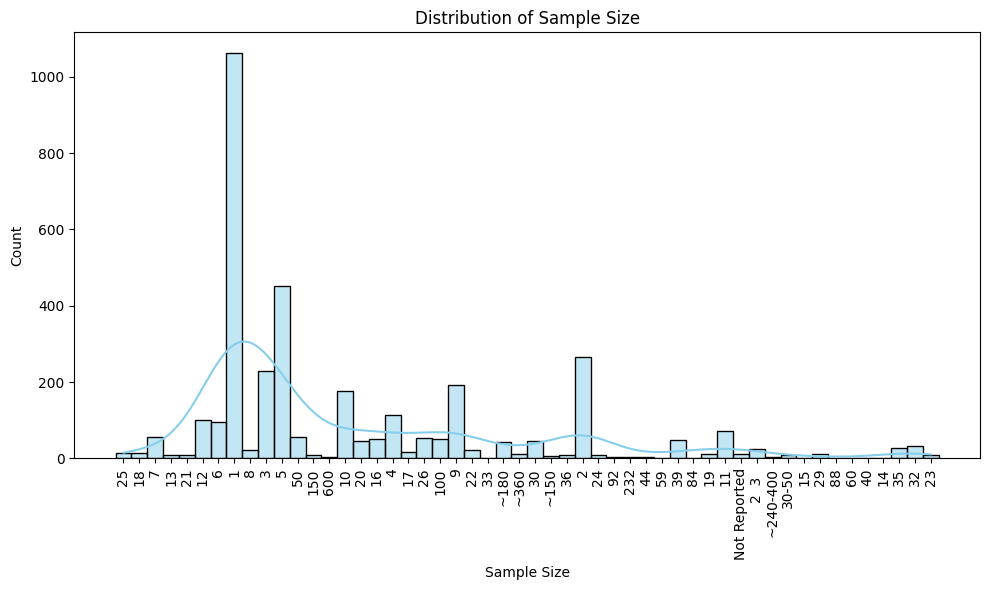

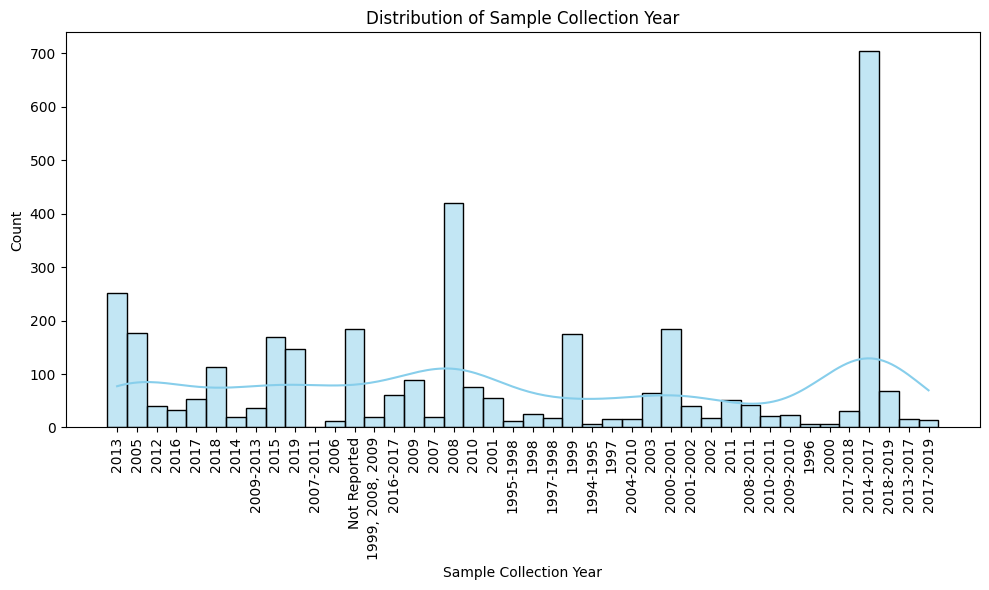

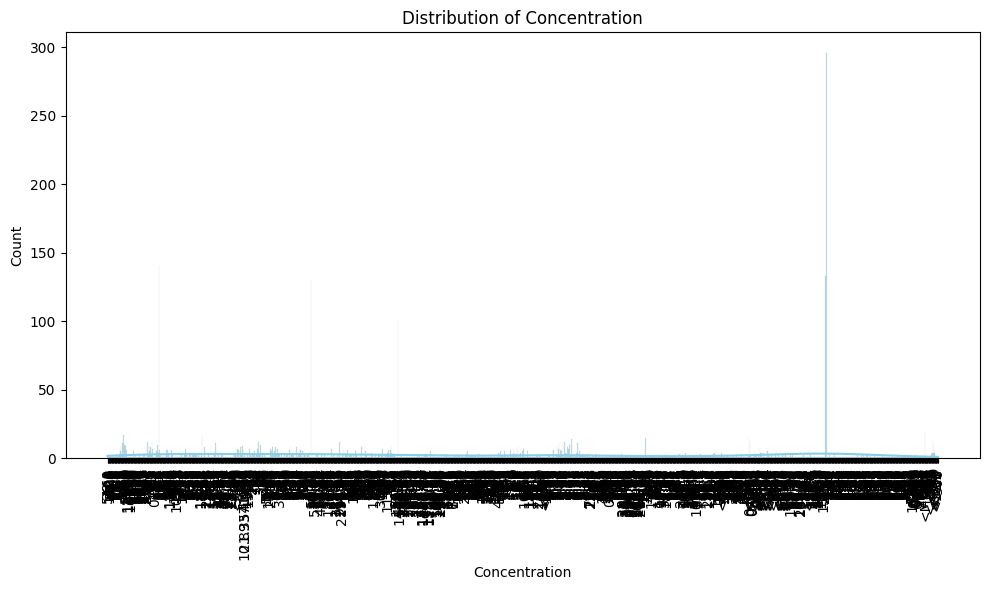

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 定義需要繪製的數值型特徵
features = [ 'Sample Size', 'Sample Collection Year','Concentration']

# 遍歷特徵進行繪圖
for feature in features:
    plt.figure(figsize=(10, 6))  # 設置圖表大小
    sns.histplot(data=db, x=feature, kde=True, color='skyblue')  # 繪製直方圖及密度曲線
    plt.title('Distribution of ' + feature)  # 設置標題
    plt.xlabel(feature)  # 設置 x 標籤
    plt.xticks(rotation=90)  # 將 x 標籤旋轉 90 度
    plt.tight_layout()  # 優化佈局避免重疊
    plt.show()  # 顯示圖形




<ipython-input-219-f83b915a65ee>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


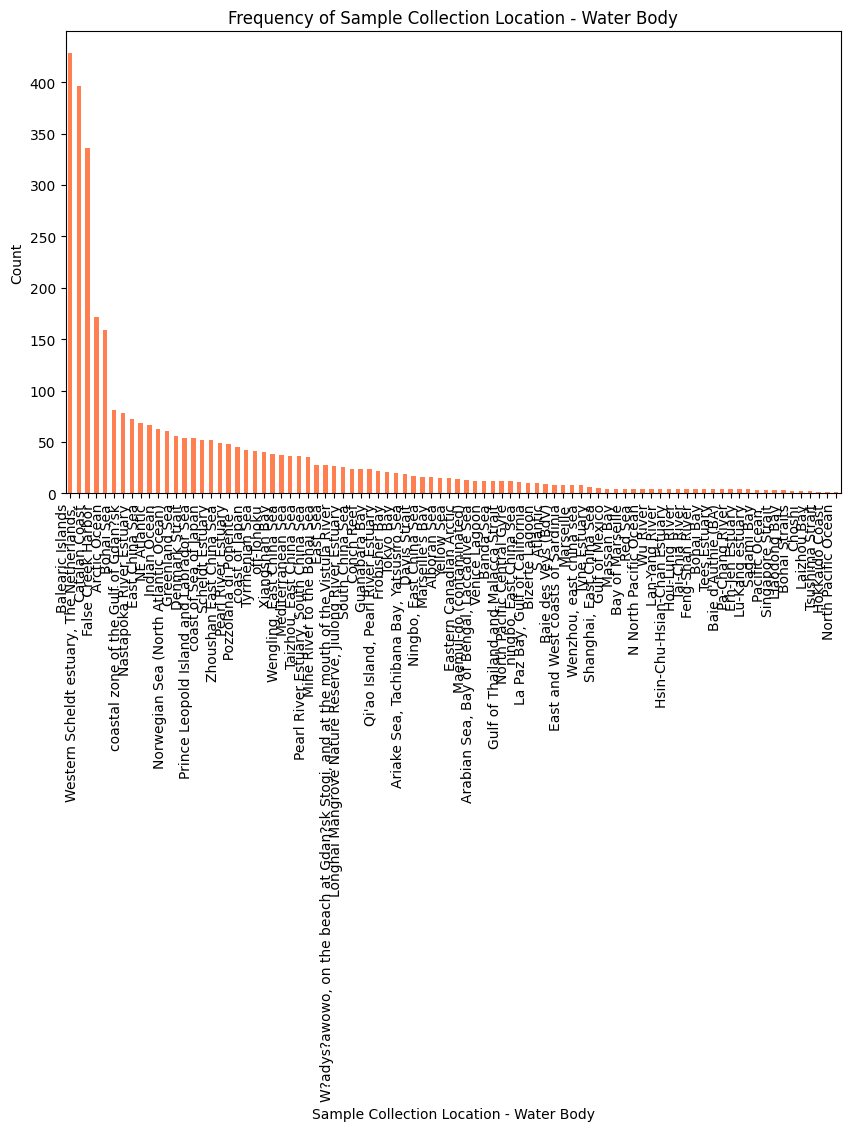

In [ ]:
import matplotlib.pyplot as plt

# 計算每個類別的出現次數
value_counts = db['Sample Collection Location - Water Body'].value_counts()

# 繪製條形圖
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='coral')

# 設置標題和軸標籤
plt.title('Frequency of Sample Collection Location - Water Body')
plt.xlabel('Sample Collection Location - Water Body')
plt.ylabel('Count')

# 明確設置 X 軸標籤，避免默認為數字
plt.xticks(ticks=range(len(value_counts)), labels=value_counts.index, rotation=90, ha='right')

# 優化佈局並顯示圖形
plt.tight_layout()
plt.show()


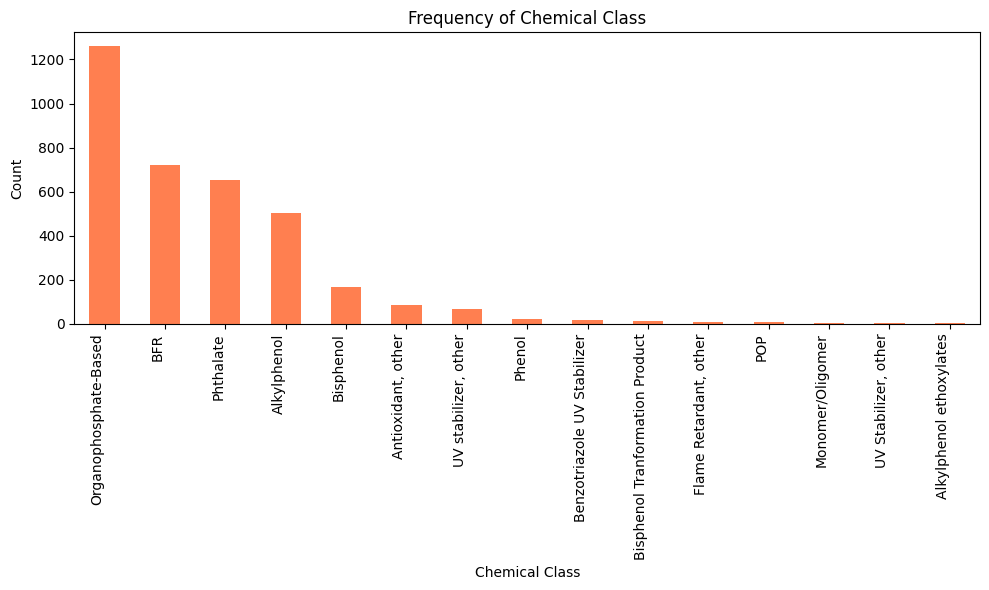

In [ ]:
import matplotlib.pyplot as plt

# 計算每個類別的出現次數
value_counts = db['Chemical Class'].value_counts()

# 繪製條形圖
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='coral')

# 設置標題和軸標籤
plt.title('Frequency of Chemical Class')
plt.xlabel('Chemical Class')
plt.ylabel('Count')

# 明確設置 X 軸標籤，避免默認為數字
plt.xticks(ticks=range(len(value_counts)), labels=value_counts.index, rotation=90, ha='right')

# 優化佈局並顯示圖形
plt.tight_layout()
plt.show()


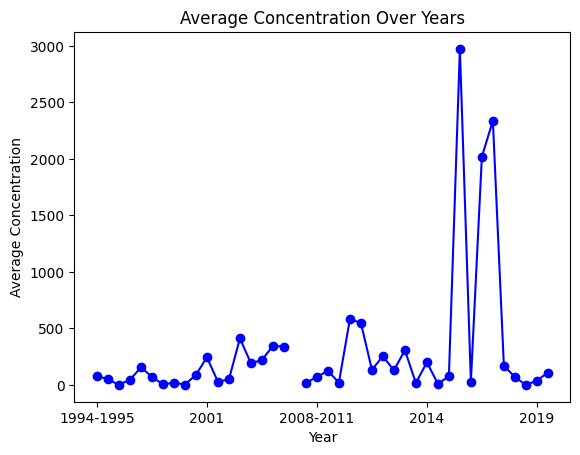

In [ ]:
# Convert 'Concentration' column to numeric, handling errors
db['Concentration'] = pd.to_numeric(db['Concentration'], errors='coerce')

# Now calculate yearly_data
yearly_data = db.groupby('Sample Collection Year')['Concentration'].mean()

# Proceed with plotting
yearly_data.plot(kind='line', marker='o', color='b')
plt.title('Average Concentration Over Years')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.show()

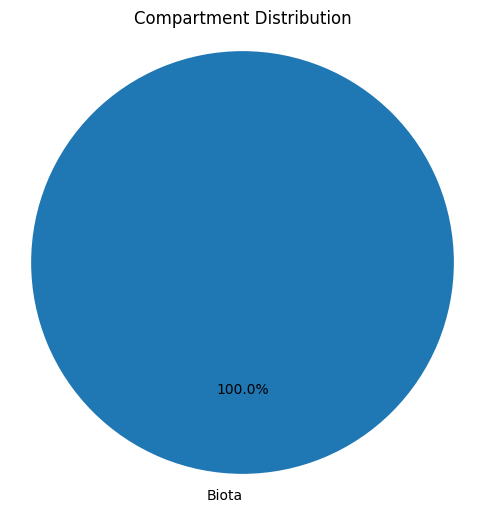

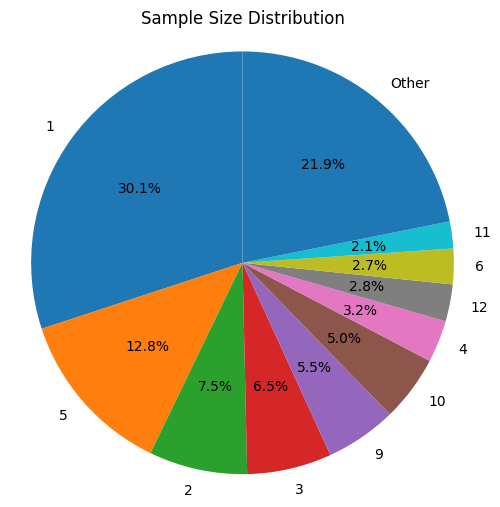

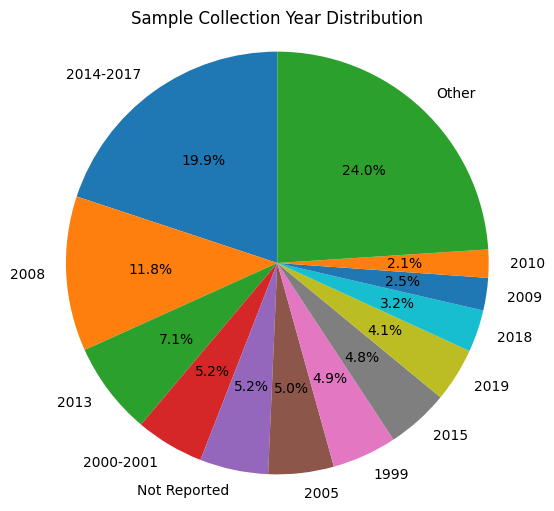

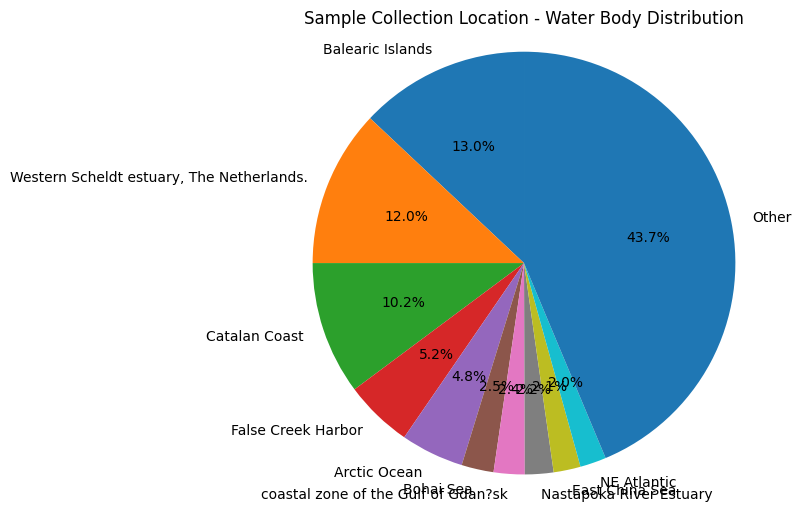

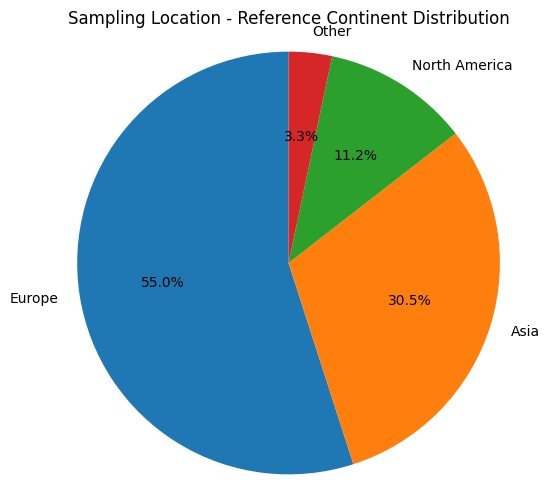

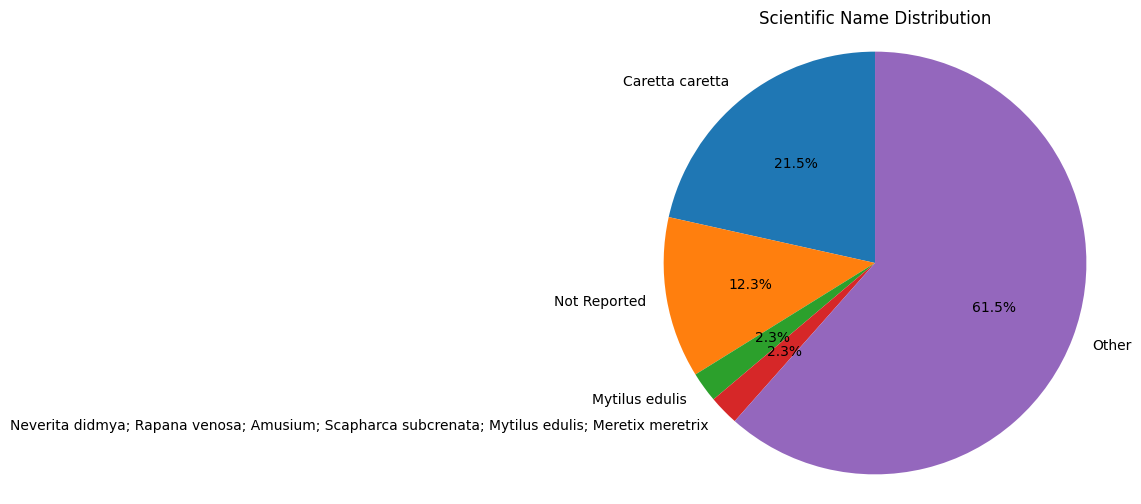

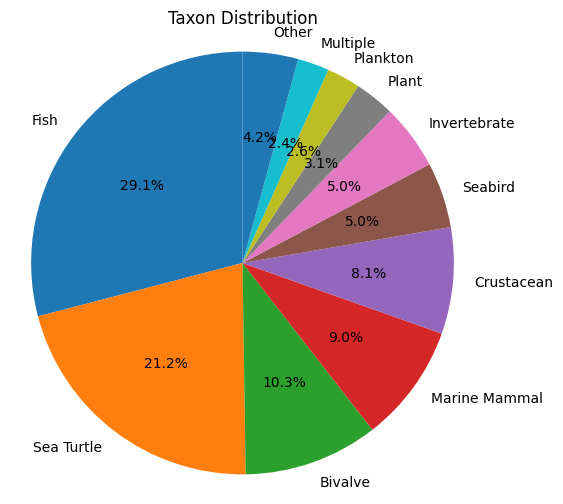

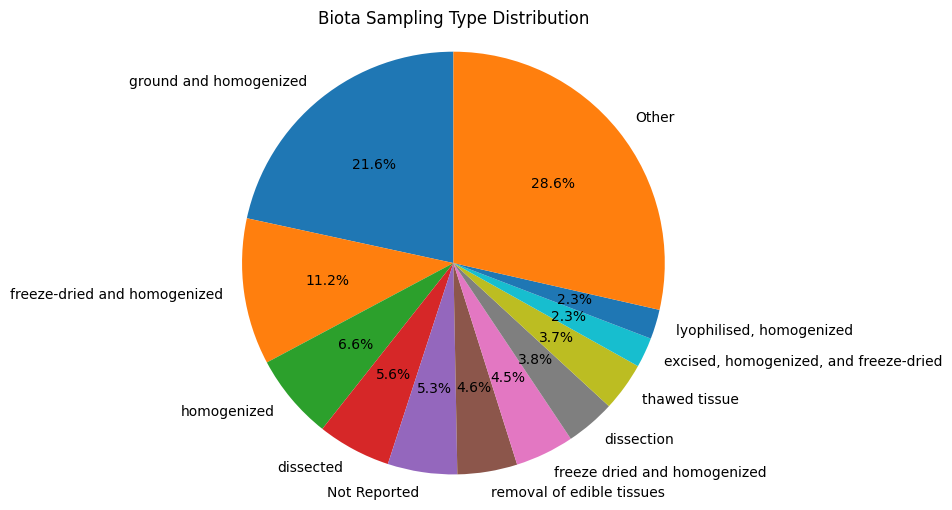

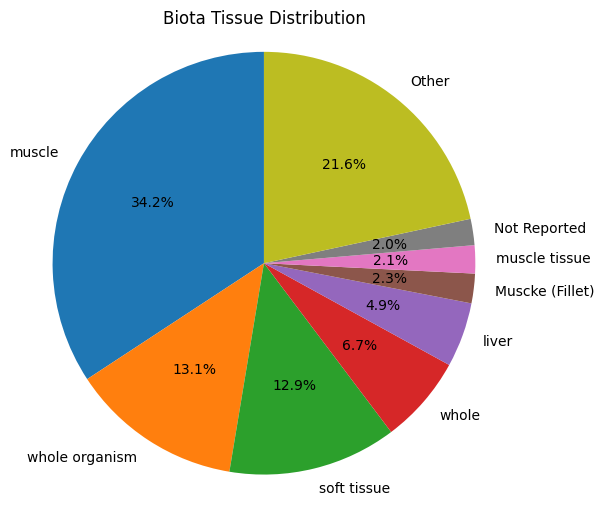

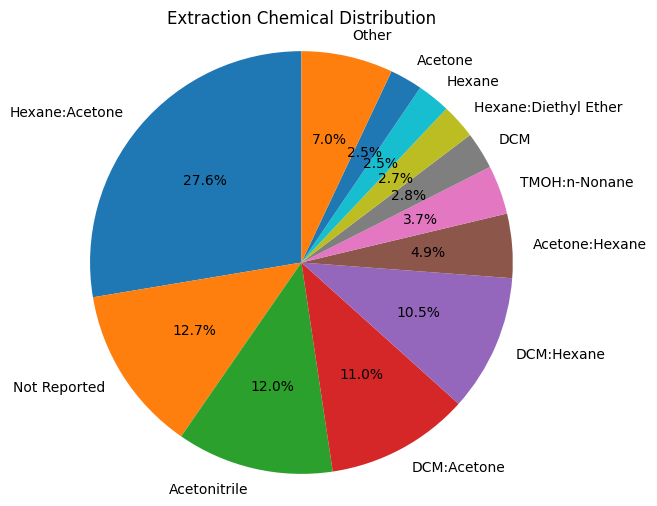

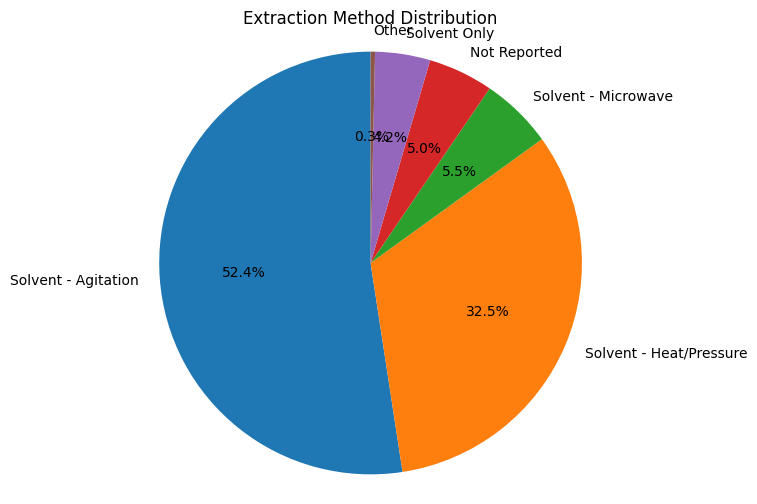

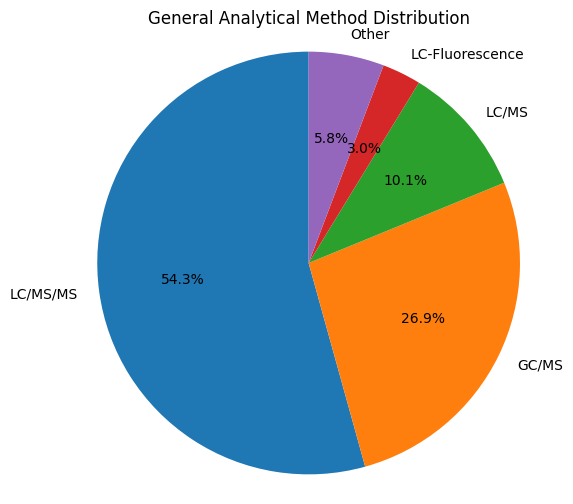

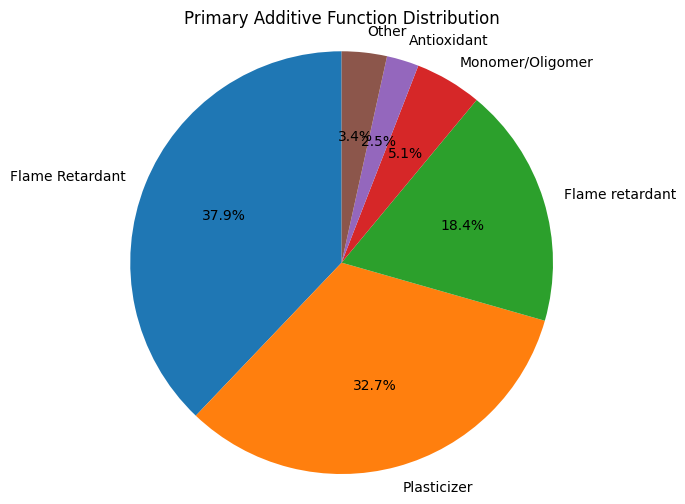

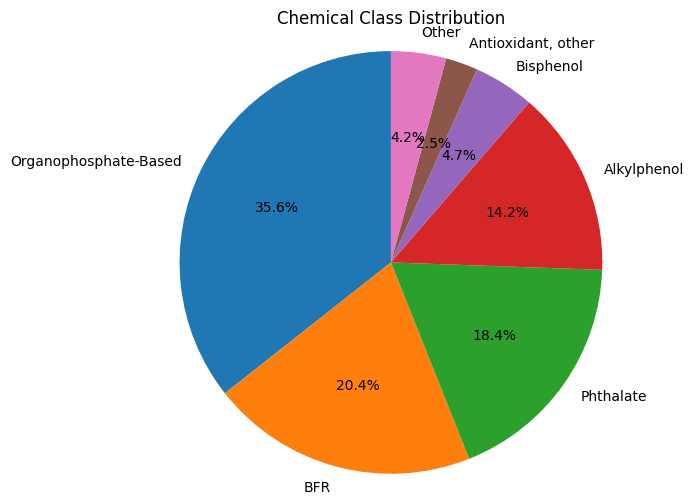

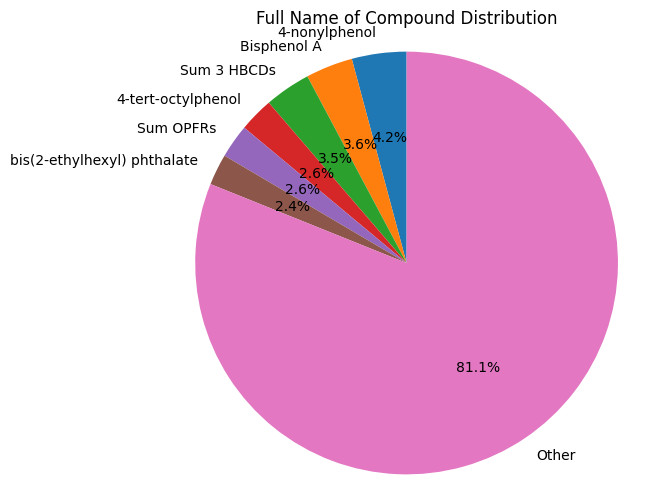

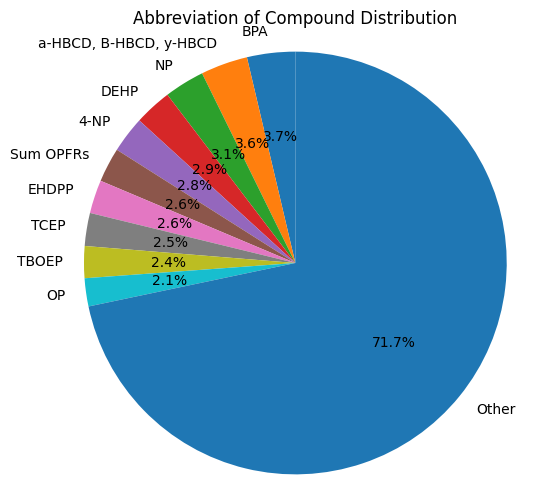

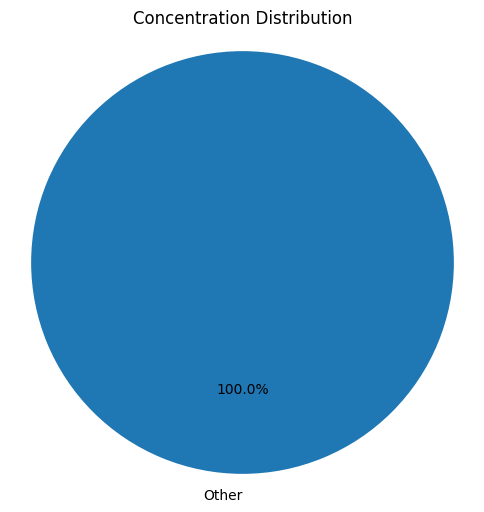

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 繪製圓餅圖的函數
def draw_pie_chart(column_name):
    # 計算類別統計數量
    value_counts = db[column_name].value_counts()
    total = value_counts.sum()

    # 計算每個類別的比例
    proportions = value_counts / total

    # 合併比例小於 2% 的類別為 "Other"
    filtered_counts = value_counts[proportions >= 0.02]
    others_count = value_counts[proportions < 0.02].sum()
    if others_count > 0:
        filtered_counts["Other"] = others_count

    # 提取標籤和數據
    labels = filtered_counts.index
    sizes = filtered_counts.values

    # 繪製圓餅圖
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
    plt.title(f"{column_name} Distribution")
    plt.axis('equal')  # 確保圓餅圖為圓形
    plt.show()

# 需要繪製的欄位名稱
columns_to_plot = [
    "Compartment", "Sample Size", "Sample Collection Field Method",
    "Sample Collection Year", "Sample Collection Location - Water Body",
    "Sample Collection Location - Reference Land Mass",
    "Sampling Location - Reference Continent", "Scientific Name",
    "Common Name", "Taxon", "Biota Sampling Type", "Biota Tissue",
    "Extraction Chemical", "Extraction Method", "General Analytical Method",
    "Specific Analytical Method", "Primary Additive Function", "Chemical Class",
    "Full Name of Compound", "Abbreviation of Compound", "Concentration",
    ]

# 為每個欄位繪製圓餅圖
for column in columns_to_plot:
    if column in db.columns:
        draw_pie_chart(column)


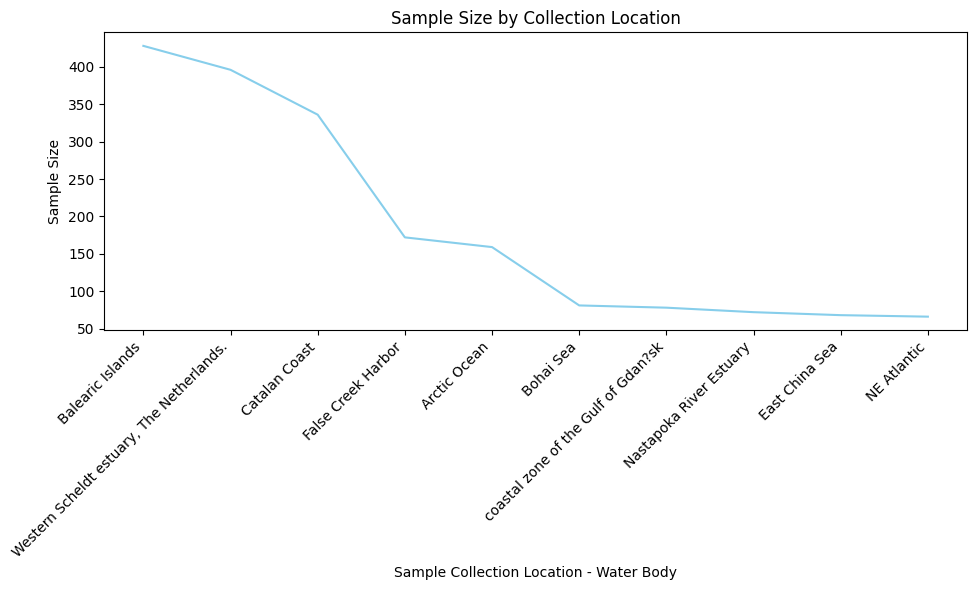

In [ ]:
# 計算每個採集地點的計數並獲取前十名
top_locations = db['Sample Collection Location - Water Body'].value_counts().nlargest(10)

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.plot(top_locations.index, top_locations.values, color='skyblue')

# 加上標題和標籤
plt.title('Sample Size by Collection Location')
plt.xlabel('Sample Collection Location - Water Body')
plt.ylabel('Sample Size')

# 旋轉 x 軸標籤以避免重疊
plt.xticks(rotation=45, ha='right')

# 顯示圖形
plt.tight_layout()
plt.show()

<ipython-input-224-9672ab3103c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


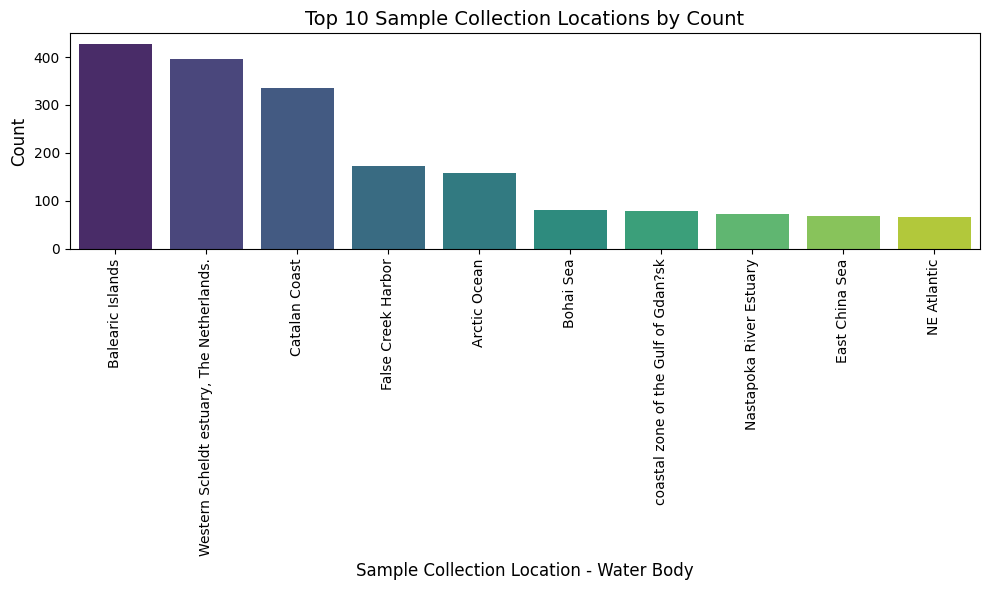

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 確保有正確的數據
value_counts = db['Sample Collection Location - Water Body'].value_counts()[:10]

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# 設定標題和軸標籤
plt.title('Top 10 Sample Collection Locations by Count', fontsize=14)
plt.xlabel('Sample Collection Location - Water Body', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 顯示圖表
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import time

# 原始地點與數據
data = pd.DataFrame({
    'Location': [
        'Balearic Islands',
        'Western Scheldt estuary, The Netherlands',
        'Catalan Coast',
        'nan',
        'False Creek Harbor',
        'Arctic Ocean',
        'Bohai Sea',
        'coastal zone of the Gulf of Gdansk',
        'Nastapoka River Estuary',
        'East China Sea'
    ],
    'Count': [428, 396, 336, 241, 172, 159, 81, 78, 72, 68]
})

# 清理地點名稱
data['Location'] = data['Location'].replace('nan', None)  # 將 'nan' 替換為 None
data['Location'] = data['Location'].str.replace(r'\?s', 'sk', regex=True)  # 替換特殊字符

# 初始化地理編碼器
geolocator = Nominatim(user_agent="geoapi")

# 地理編碼函數
def geocode_location(location_name):
    try:
        if location_name is None:
            return None, None
        location = geolocator.geocode(location_name, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# 將地名轉換為經緯度
data[['Latitude', 'Longitude']] = data['Location'].apply(
    lambda x: pd.Series(geocode_location(x))
)

# 輸出地理編碼結果
print(data)

# 繪製地圖
m = folium.Map(location=[20, 0], zoom_start=2)

# 將地點標記為大小可變的圓
for _, row in data.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Count'] / 20,  # 動態調整點的大小，根據需求調整比例
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{row['Location']} (Count: {row['Count']})"
        ).add_to(m)

# 保存地圖為 HTML 文件
m.save("variable_size_map.html")
print("地圖已保存為 'variable_size_map.html'")


                                   Location  Count   Latitude   Longitude
0                          Balearic Islands    428  39.613432    2.882918
1  Western Scheldt estuary, The Netherlands    396        NaN         NaN
2                             Catalan Coast    336  11.455717  122.840859
3                                      None    241        NaN         NaN
4                        False Creek Harbor    172  48.520771 -123.118995
5                              Arctic Ocean    159  83.000000 -170.000000
6                                 Bohai Sea     81  39.000978  119.967522
7        coastal zone of the Gulf of Gdansk     78        NaN         NaN
8                   Nastapoka River Estuary     72        NaN         NaN
9                            East China Sea     68  29.000000  125.000001
地圖已保存為 'variable_size_map.html'


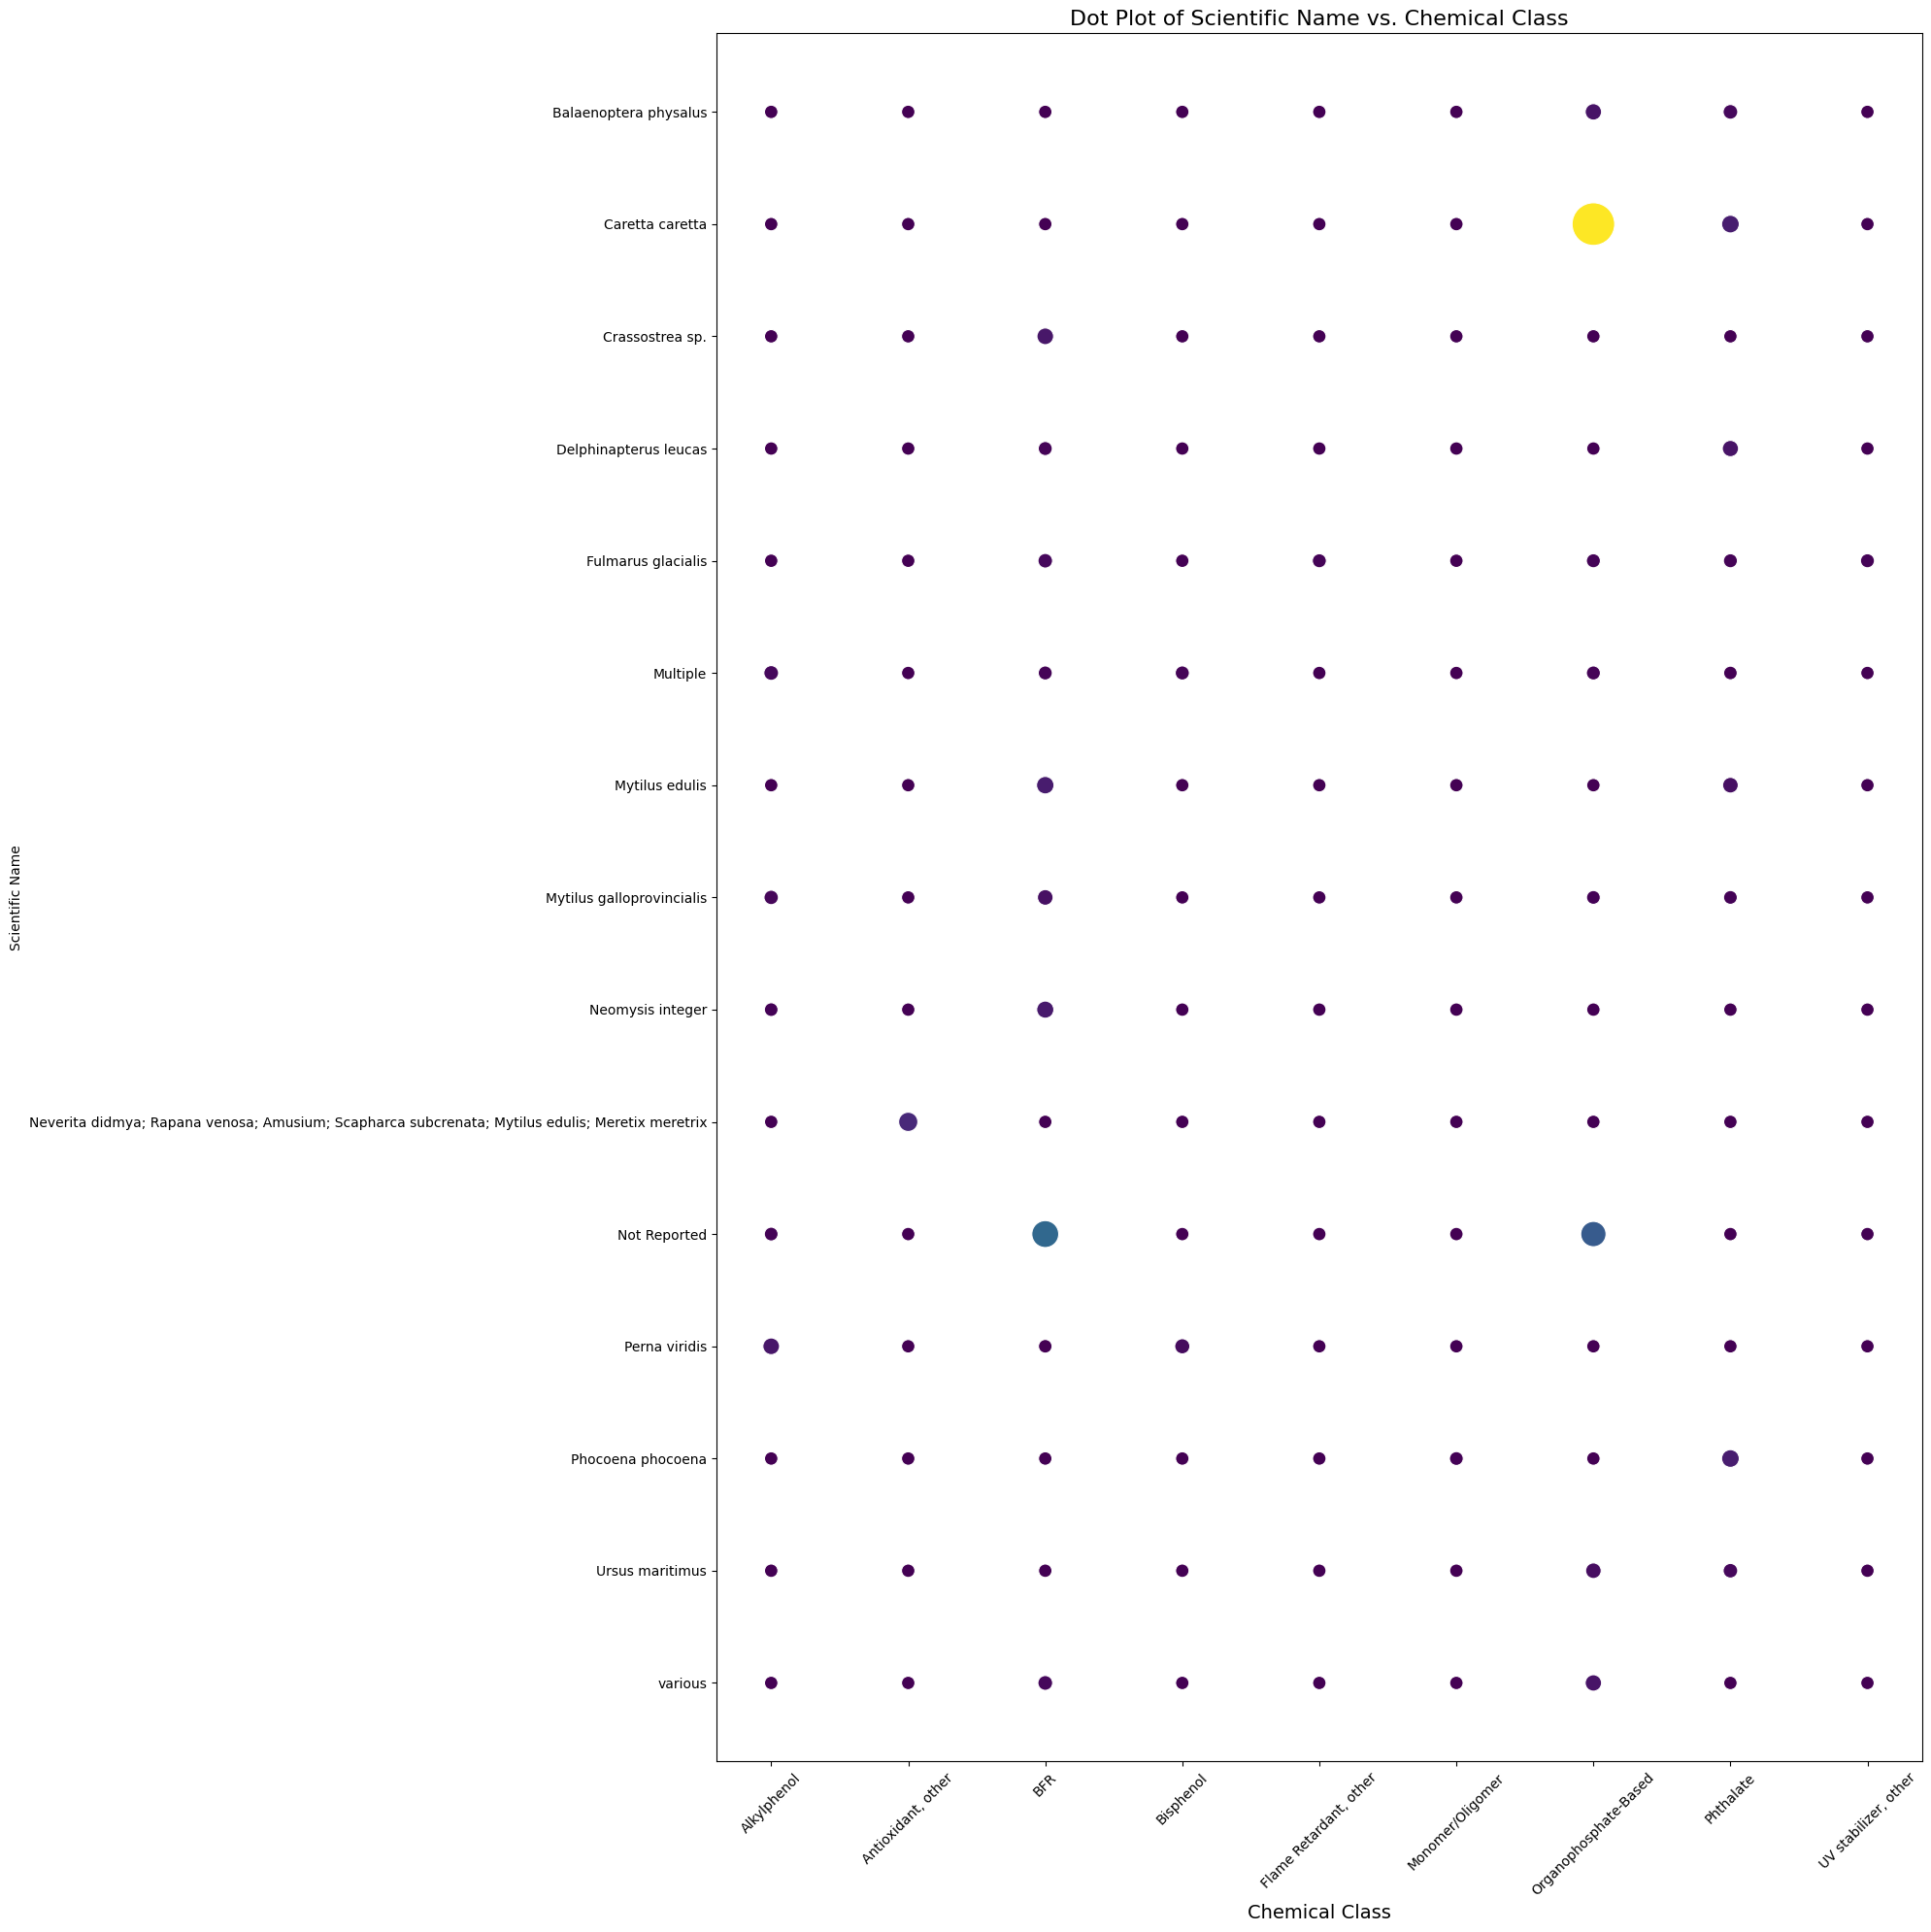

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Ensure there are no NaN values in 'Scientific Name' or 'Chemical Class'
db_cleaned = db.dropna(subset=["Scientific Name", "Chemical Class"])

# 計算每個 'Scientific Name' 的出現次數
scientific_name_counts = db_cleaned["Scientific Name"].value_counts()

# 選擇出現次數最多的前 15 名 'Scientific Name'
top_15_scientific_names = scientific_name_counts.head(15).index

# 過濾出這些 'Scientific Name' 的資料
filtered_db = db_cleaned[db_cleaned["Scientific Name"].isin(top_15_scientific_names)]

# 檢查 'Scientific Name' 是否包含 "Not Reported"
if "Not reported" in filtered_db["Scientific Name"].values:
    # 匯入提示圖片
    img_path = "path_to_your_image.jpg"  # 替換為提示圖片的路徑
    img = Image.open(img_path)
    img.show()
else:
    # 創建交叉表，計算每個 'Scientific Name' 和 'Chemical Class' 的出現次數
    pivot_table = pd.crosstab(filtered_db["Scientific Name"], filtered_db["Chemical Class"])

    # 將交叉表轉換為長格式
    long_format = pivot_table.reset_index().melt(id_vars="Scientific Name", var_name="Chemical Class", value_name="Count")

    # 繪製點圖
    plt.figure(figsize=(20, 20))
    sns.scatterplot(data=long_format,
                    x="Chemical Class",
                    y="Scientific Name",
                    size="Count",
                    hue="Count",
                    palette="viridis",
                    sizes=(100, 1000),  # 調整點的大小範圍
                    legend=False)  # 關閉圖例，讓視覺效果更加簡潔

    # 設定圖表標題和軸標籤
    plt.title("Dot Plot of Scientific Name vs. Chemical Class", fontsize=16)
    plt.xlabel("Chemical Class", fontsize=14)
    plt.ylabel("Scientific Name", fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 顯示圖表
    plt.show()


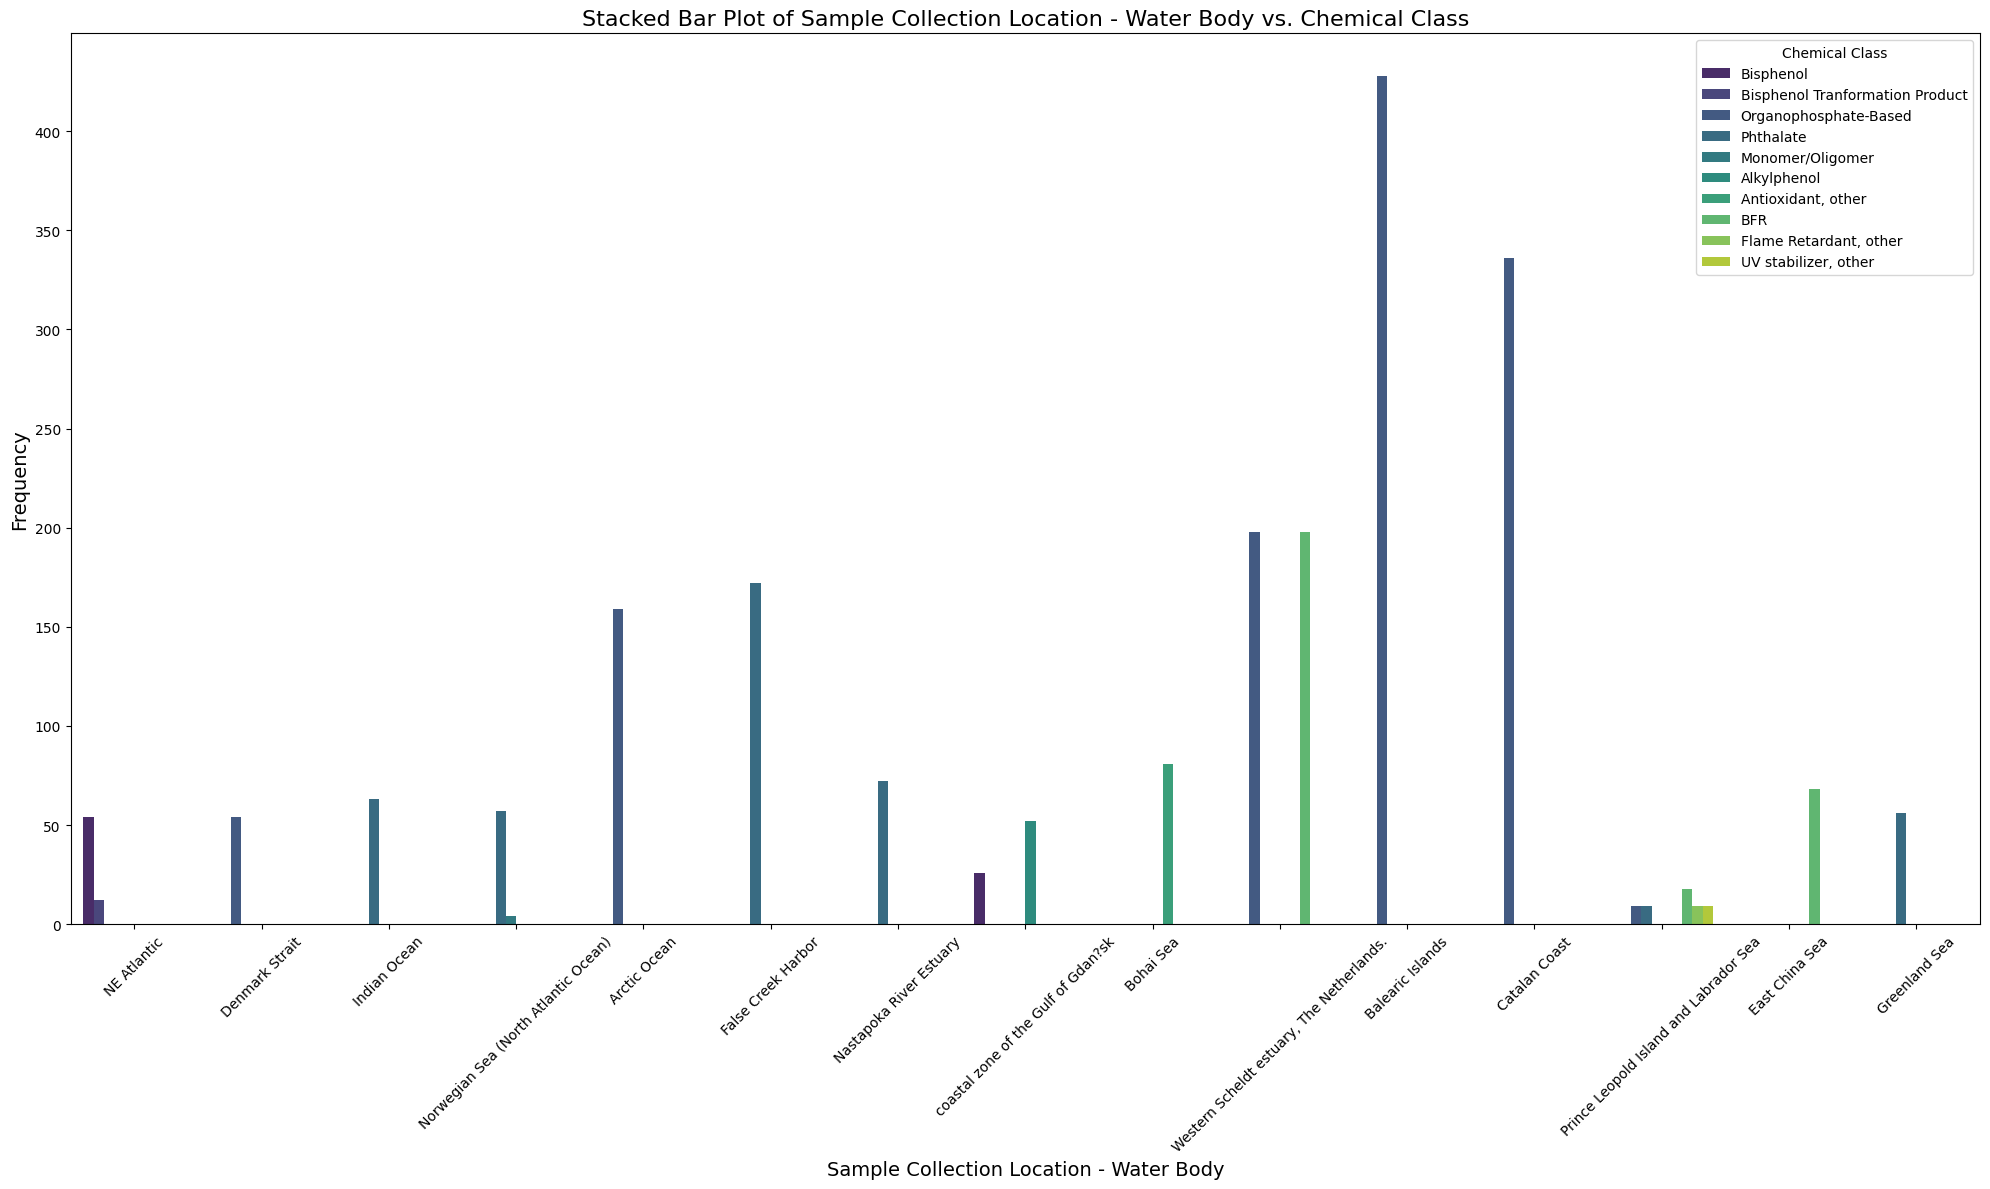

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 計算不同水體地點的頻率
water_body_frequency = db['Sample Collection Location - Water Body'].value_counts().reset_index()
water_body_frequency.columns = ['Sample Collection Location - Water Body', 'Frequency']

# 選擇頻率排名前 15 的水體地點
top_15_water_bodies = water_body_frequency.head(15)['Sample Collection Location - Water Body']

# 過濾資料集，只保留前 15 水體地點的資料
filtered_db = db[db['Sample Collection Location - Water Body'].isin(top_15_water_bodies)]

# 使用 Seaborn 的 countplot 繪製堆疊柱狀圖
plt.figure(figsize=(20, 12))
sns.countplot(data=filtered_db, x="Sample Collection Location - Water Body", hue="Chemical Class", palette="viridis")

# 設定圖表標題和軸標籤
plt.title("Stacked Bar Plot of Sample Collection Location - Water Body vs. Chemical Class", fontsize=16)
plt.xlabel("Sample Collection Location - Water Body", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


# 資料離散 Data Discretize

發現concerntration有極端值，導致直方圖分布不均勻

count     2491.000000
mean       188.444086
std        997.809264
min          0.000000
25%          1.400000
50%          7.400000
75%         39.650000
max      19890.500000
Name: Concentration, dtype: float64


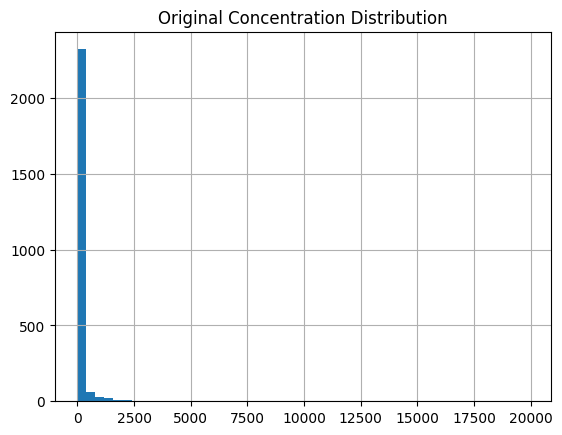

In [ ]:

# 檢查數據的統計信息
print(db['Concentration'].describe())

# 繪製原始數據的直方圖
db['Concentration'].hist(bins=50)
plt.title("Original Concentration Distribution")
plt.show()


對數變換（Log Transformation）
對數變換可以壓縮數據範圍，減少極端值的影響，適合處理偏態分佈。

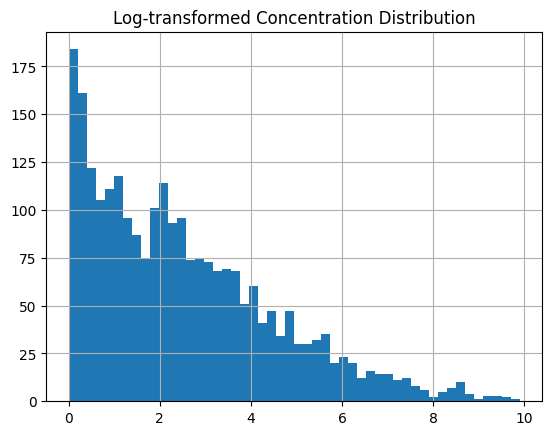

In [ ]:
import numpy as np

# Convert 'Concentration' column to numeric, handling errors
db['Concentration'] = pd.to_numeric(db['Concentration'], errors='coerce')

# 添加 1 防止 log(0) 的錯誤
db['Concentration_log'] = np.log1p(db['Concentration'])

# 繪製對數轉換後的分佈
db['Concentration_log'].hist(bins=50)
plt.title("Log-transformed Concentration Distribution")
plt.show()

In [ ]:
# 用平均值填補
db['Concentration_log'] = db['Concentration_log'].fillna(db['Concentration_log'].mean())


In [ ]:
print(db.isnull().sum())

Compartment                                             0
Sample Size                                             0
Sample Collection Year                                  0
Sample Collection Location - Water Body               241
Sample Collection Location - Reference Land Mass        2
Sampling Location - Reference Continent                 0
Scientific Name                                         0
Taxon                                                   0
Biota Sampling Type                                     0
Biota Tissue                                            0
Extraction Chemical                                    12
Extraction Method                                       0
General Analytical Method                               0
Primary Additive Function                               0
Chemical Class                                          0
Full Name of Compound                                  15
Abbreviation of Compound                               88
Concentration 

發現sample size有極端值，導致直方圖分布不均勻





count     3537
unique      52
top          1
freq      1063
Name: Sample Size, dtype: object


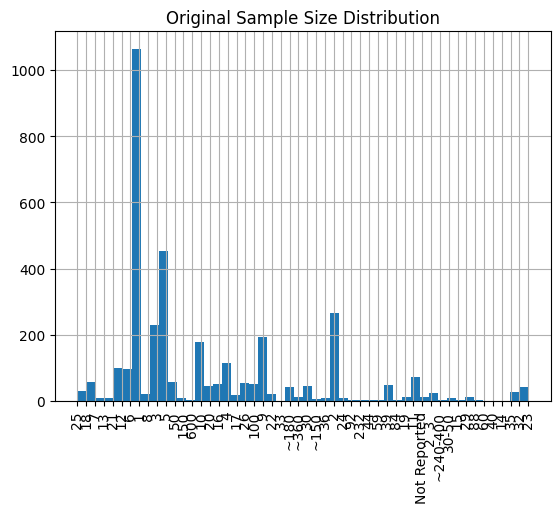

In [ ]:
# 檢查數據的統計信息
print(db['Sample Size'].describe())

# 繪製原始數據的直方圖
db['Sample Size'].hist(bins=50)
plt.title("Original Sample Size Distribution")
plt.xticks(rotation=90)
plt.show()

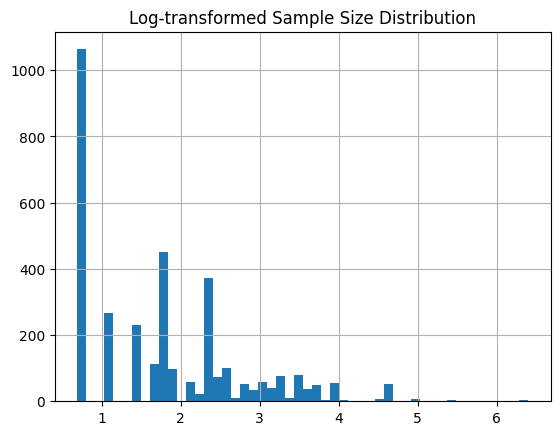

In [ ]:
# Convert 'Sample Size' column to numeric, handling errors
db['Sample Size'] = pd.to_numeric(db['Sample Size'], errors='coerce')

# 添加 1 防止 log(0) 的錯誤
db['Sample_Size_log'] = np.log1p(db['Sample Size'])

# 繪製對數轉換後的分佈
db['Sample_Size_log'].hist(bins=50)
plt.title("Log-transformed Sample Size Distribution")
plt.show()

# Feature Selection

## Chi2 卡方檢定


使用卡方檢驗（Chi-squared test）來選擇影響物種最具影響力的特徵

In [ ]:
from sklearn import feature_selection as fs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 分離特徵 (X) 和目標變量 (y)
X = db.drop(columns=['Scientific Name'])  # 替換 'target_column' 為實際的目標列名
y = db['Scientific Name']

# 確保 X 中的所有特徵都是數值類型，必要時進行編碼
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # 將所有非數值轉為數值，並將缺失值填充為0

# 使用 SelectKBest 和 chi2 進行卡方檢驗，選擇最好的特徵
selector = SelectKBest(score_func=chi2, k='all')  # k='all' 表示選擇所有特徵，稍後可以根據分數選擇前幾個
selector.fit(X, y)

# 獲取卡方檢驗的分數和 p 值
chi2_scores = selector.scores_
p_values = selector.pvalues_

# 打印結果，或者進行進一步分析
print("Chi-squared scores:", chi2_scores)
print("P-values:", p_values)

# 如果你想要挑選出前幾個重要特徵，可以這樣做：
k_best = SelectKBest(score_func=chi2, k=8)  # 這裡選擇前 8 個特徵
X_kbest = k_best.fit_transform(X, y)

# 查看選出的前 5 個特徵名稱
selected_features = X.columns[k_best.get_support()]
print("Selected top 5 features:", selected_features)


Chi-squared scores: [           nan 1.75105493e+05 2.50566175e+06            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
 5.07856675e+06            nan 1.29746904e+03 1.71203616e+03]
P-values: [            nan 0.00000000e+000 0.00000000e+000             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
 0.00000000e+000             nan 7.85140398e-172 1.23786758e-251]
Selected top 5 features: Index(['Sample Size', 'Sample Collection Year', 'Full Name of Compound',
       'Abbreviation of Compound', 'Concentration', 'Concentration Units',
       'Concentration_log', 'Sample_Size_log'],
      dtype='object')


In [ ]:
# Convert 'Concentration' column to numeric, handling errors
db['Concentration'] = pd.to_numeric(db['Concentration'], errors='coerce')

bins = [0, 10, 50, 100, 500, 2000, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']
db['Concentration_class'] = pd.cut(db['Concentration'], bins=bins, labels=labels)

In [ ]:
contingency_table = pd.crosstab(db['Chemical Class'], db['Scientific Name'])


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared:", chi2)
print("p-value:", p)


Chi-squared: 25832.237391845298
p-value: 0.0


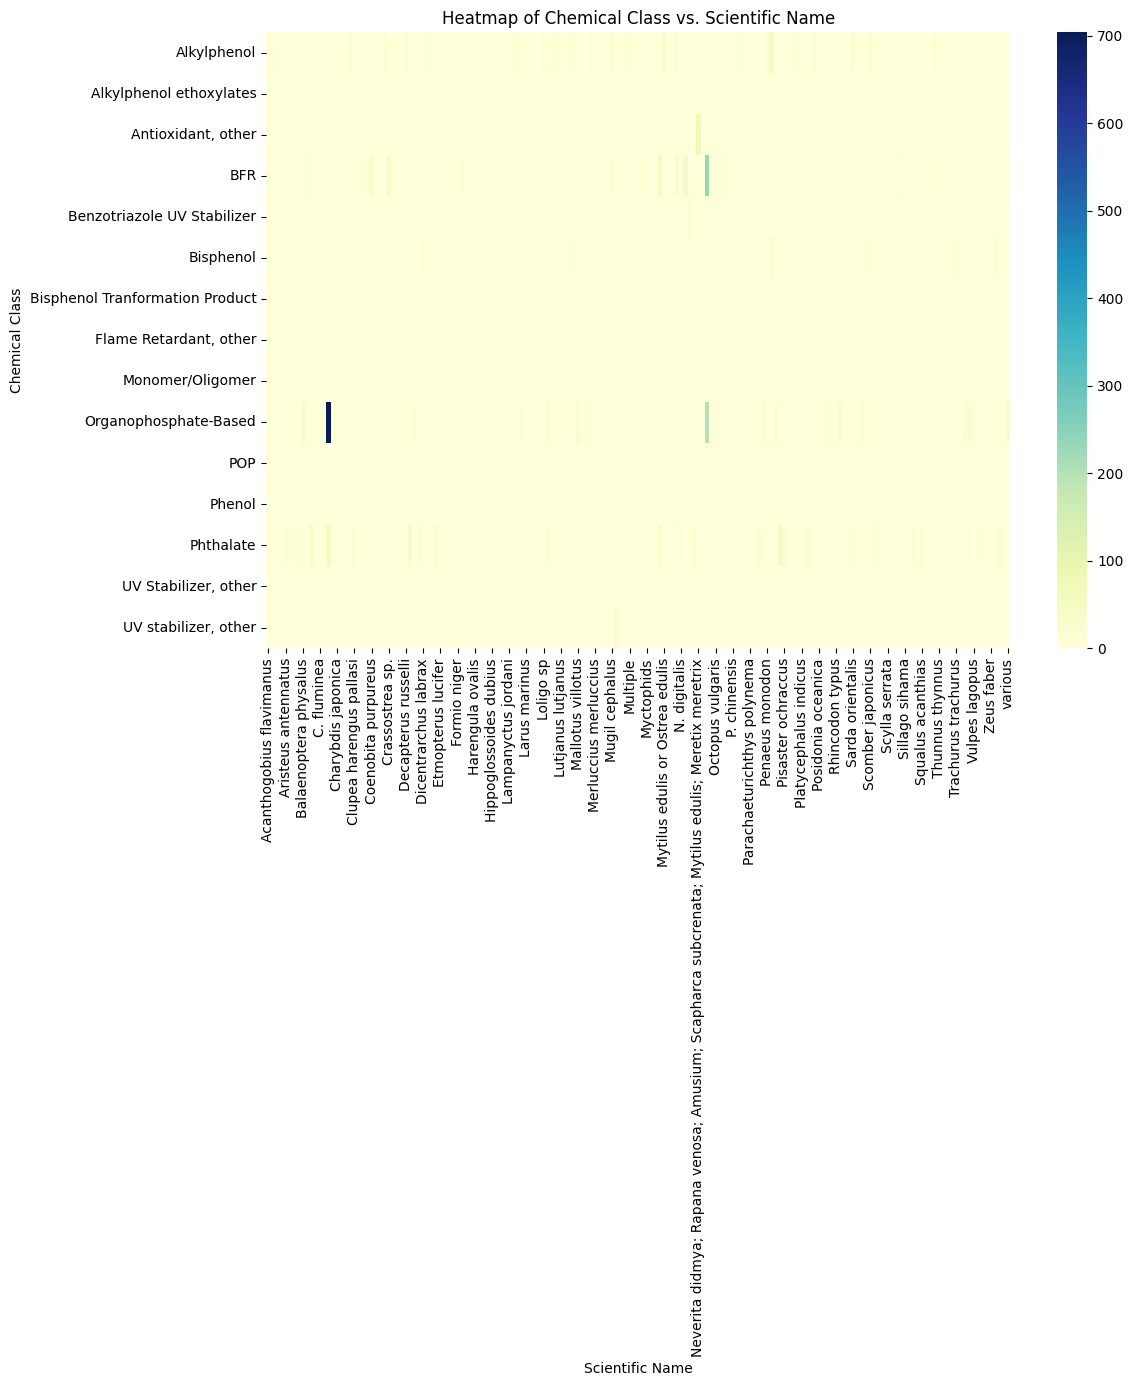

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Chemical Class vs. Scientific Name")
plt.xlabel("Scientific Name")
plt.ylabel("Chemical Class")
plt.show()


卡方檢定：對數轉換的concentration

In [ ]:
# Convert 'Concentration' column to numeric, handling errors
db['Concentration'] = pd.to_numeric(db['Concentration'], errors='coerce')

# Create 'Concentration_log' if it doesn't exist
if 'Concentration_log' not in db.columns:  # Check if column exists
    # 添加 1 防止 log(0) 的錯誤
    db['Concentration_log'] = np.log1p(db['Concentration'])

# Fill NaN values with the mean if needed
db['Concentration_log'] = db['Concentration_log'].fillna(db['Concentration_log'].mean())

# Now, create the contingency table:
contingency_table_2 = pd.crosstab(db['Concentration_log'], db['Chemical Class'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)
print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 21656.614951831707
p-value: 1.661764176833164e-45


卡方檢定：裝箱法的Concentration

研究重點：

*   如果你的研究需要更精確的數據分析，並考慮數據的長尾分佈，對數轉換的結果更好。
如果你的目的是描述濃度的分級如何與化學類別相關，裝箱法的結果更適合。
*   模型選擇：若後續需要基於數據進行機器學習模型的建構，對數轉換後的數據可能會提供更平滑的分佈，有助於模型學習。若後續分析主要是統計描述或簡單的決策規則，裝箱法的結果更直觀。






In [ ]:
contingency_table_2 = pd.crosstab(db['Concentration_class'], db['Chemical Class'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)
print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 470.525452932258
p-value: 8.449322263550962e-63


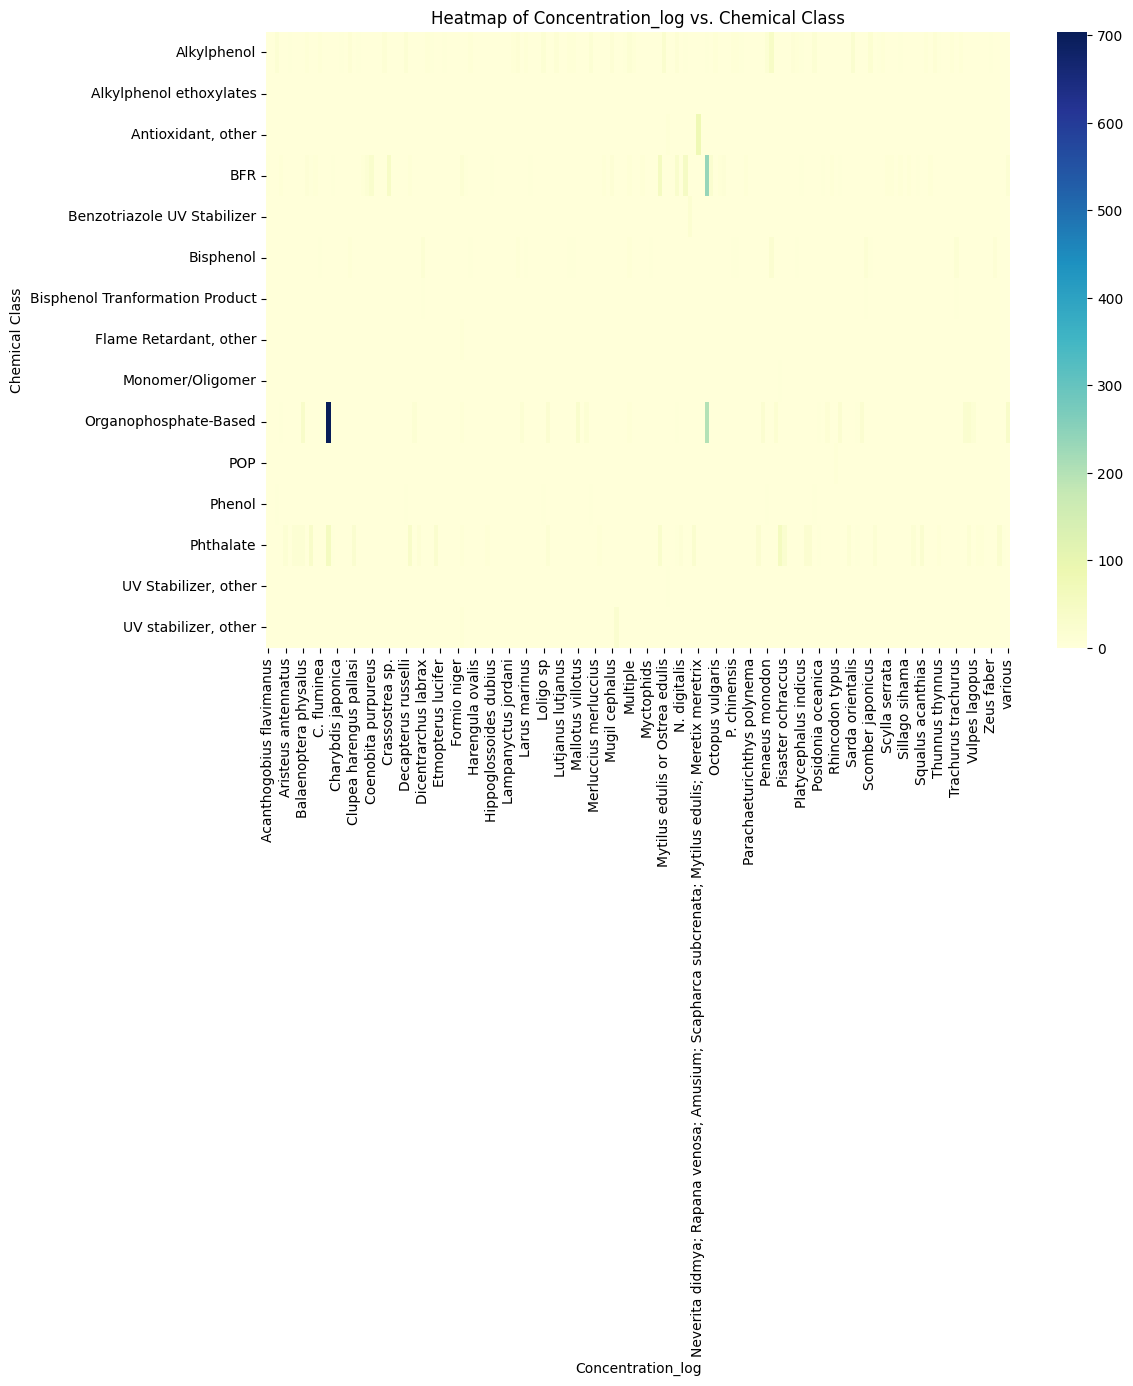

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Concentration_log vs. Chemical Class")
plt.xlabel("Concentration_log")
plt.ylabel("Chemical Class")
plt.show()

### 檢查 Concentration_class（濃度分級）與 Chemical Class 和 Common Name 之間的交互作用，確定高濃度的化學物質對特定生物是否具有更高的影響。

In [ ]:
interaction_table = pd.crosstab(
    [db['Concentration_log'], db['Chemical Class']],
    db['Scientific Name']
)
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(interaction_table)
print(f"Chi-squared: {chi2}, p-value: {p}")


Chi-squared: 419248.31535845983, p-value: 0.0


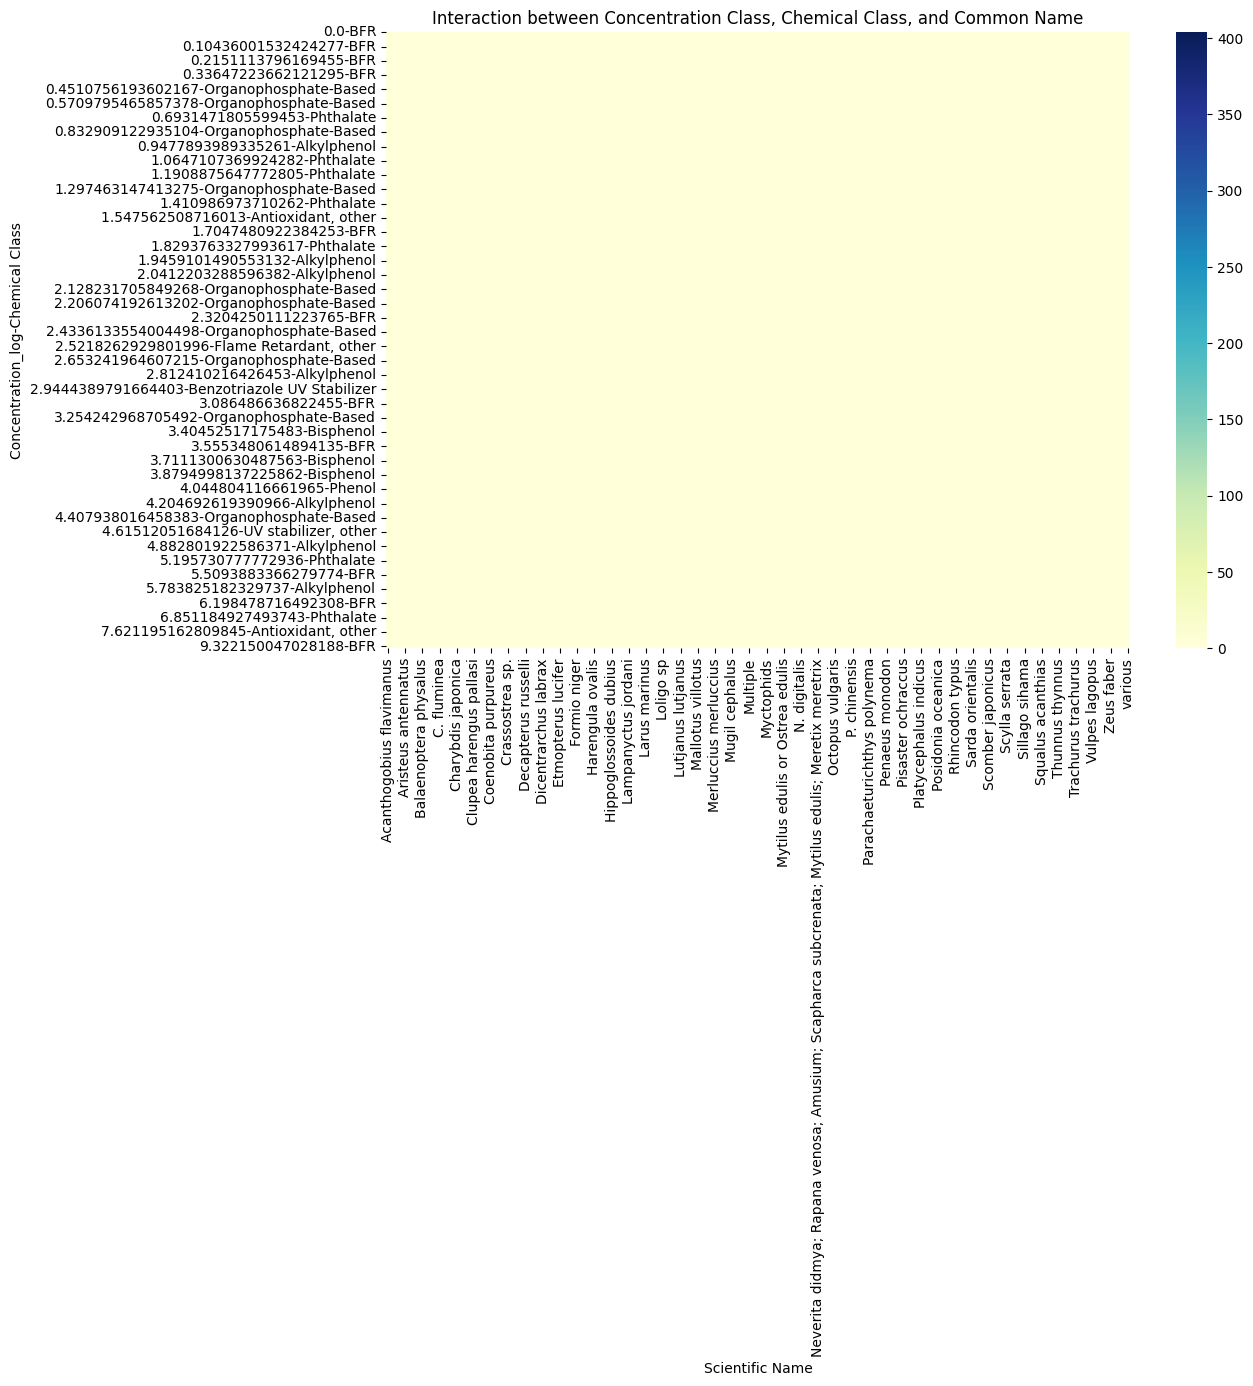

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(interaction_table, cmap='YlGnBu', annot=False, cbar=True)
plt.title("Interaction between Concentration Class, Chemical Class, and Common Name")
plt.show()


### 檢查 Sample Collection Location - Water Body 或其他地理特徵是否影響生物受到特定化學物質的影響。
值趨近於1有共線的可能性

<Axes: >

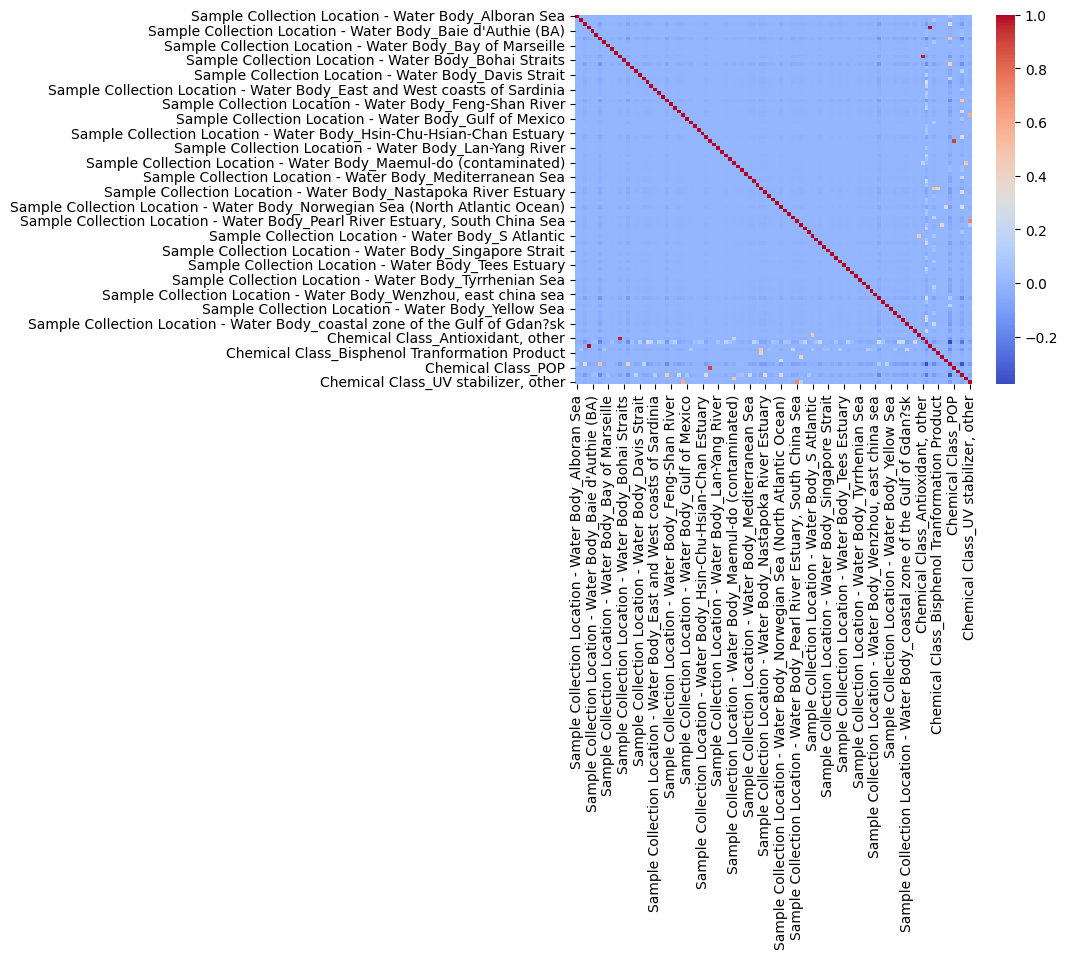

In [ ]:
X = pd.get_dummies(db[['Sample Collection Location - Water Body', 'Chemical Class']], drop_first=True)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')


PCA降維減少共線性

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # 降到 10 維
X_reduced = pca.fit_transform(X)

In [ ]:
# 將樣本數過少的地理位置合併為 "其他"
location_counts = db['Sample Collection Location - Water Body'].value_counts()
db['Sample Collection Location - Water Body'] = db['Sample Collection Location - Water Body'].apply(
    lambda x: x if pd.notna(x) and location_counts[x] > 10 else 'Other'
)


In [ ]:
import statsmodels.api as sm
X = pd.get_dummies(db[['Sample Collection Location - Water Body', 'Chemical Class']], drop_first=True)
y = db['Concentration_log']

model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:      Concentration_log   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              212.7
Date:                Sun, 22 Dec 2024   Prob (F-statistic):                        0.00
Time:                        13:51:33   Log-Likelihood:                         -6101.2
No. Observations:                3537   AIC:                                  1.233e+04
Df Residuals:                    3472   BIC:                                  1.273e+04
Df Model:                          65                                                  
Covariance Type:            nonrobust                                                  
                                                                                                                        

In [ ]:
print(db['Sample Collection Location - Water Body'].value_counts())


Sample Collection Location - Water Body
Balearic Islands                                                                      428
Other                                                                                 402
Western Scheldt estuary, The Netherlands.                                             396
Catalan Coast                                                                         336
False Creek Harbor                                                                    172
Arctic Ocean                                                                          159
Bohai Sea                                                                              81
coastal zone of the Gulf of Gdan?sk                                                    78
Nastapoka River Estuary                                                                72
East China Sea                                                                         68
NE Atlantic                                                 

In [ ]:
location_table = pd.crosstab(
    [db['Sample Collection Location - Water Body'], db['Chemical Class']],
    db['Concentration_class']
)
chi2, p, dof, ex = chi2_contingency(location_table)
print(f"Chi-squared: {chi2}, p-value: {p}")


Chi-squared: 2506.3663792895613, p-value: 4.8183595617784025e-307


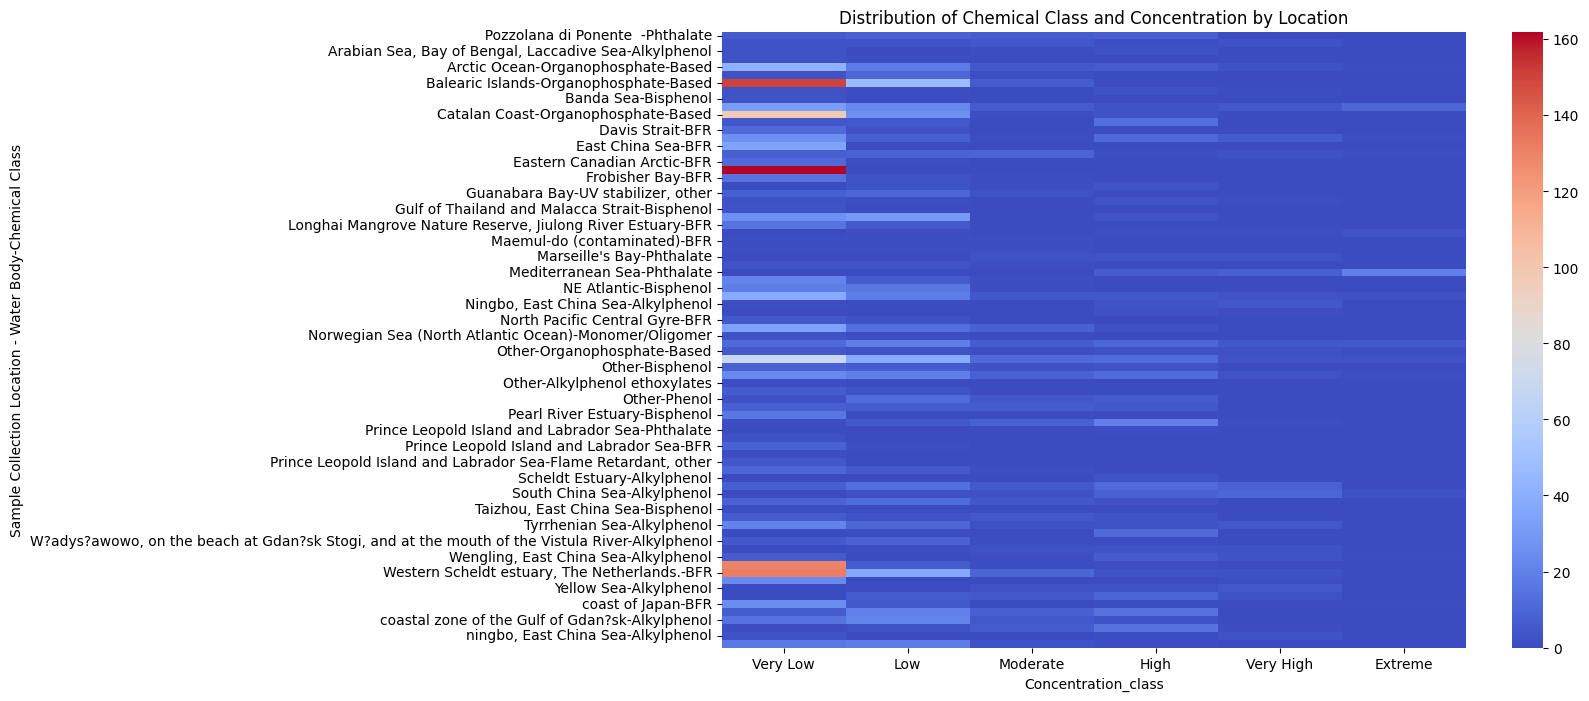

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(location_table, cmap='coolwarm', annot=False, cbar=True)
plt.title("Distribution of Chemical Class and Concentration by Location")
plt.show()


## PCA主成分分析劑型資料降維

Explained variance ratio: [0.36877837 0.33114864 0.30007299]

Loadings (Feature Contributions to PCs):
    Concentration_log  Sample Collection Year  Sample Size
0           0.246107                0.689832     0.680854
1           0.967673               -0.134911    -0.213092
2          -0.055143                0.711288    -0.700735

PCA DataFrame (First 5 Rows):
         PC1       PC2       PC3
0  1.056805  0.149290  0.213367
1  1.842380  3.238105  0.037350
2  1.507551  1.921585  0.112372
3  1.615034  2.344200  0.088290
4  1.303503  1.119286  0.158091


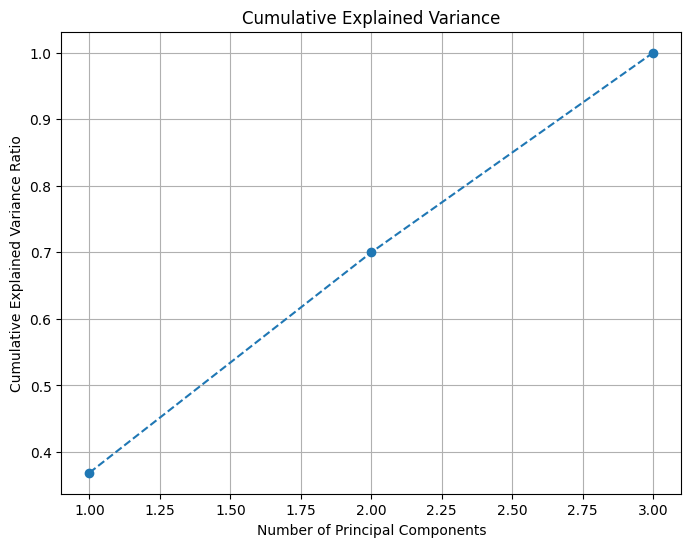

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. 数据准备
# 提取關注的特徵
features = ["Concentration_log", "Sample Collection Year", "Sample Size"]
X = db[features]

# 轉換為數值類型並處理缺失值
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# 2. 数据标准化
# PCA 對數據的尺度敏感，因此需要進行標準化。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 應用 PCA
# 創建 PCA 對象，保留所有主成分（默認設置以最大化解釋方差）。
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. 结果分析
# 獲取主成分的解釋方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# 獲取主成分載荷
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=features)
print("\nLoadings (Feature Contributions to PCs):\n", loadings_df)

# 將降維後的數據轉為 DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print("\nPCA DataFrame (First 5 Rows):\n", pca_df.head())

# 5. 可视化主成分的解釋方差累計比例
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid()
plt.show()


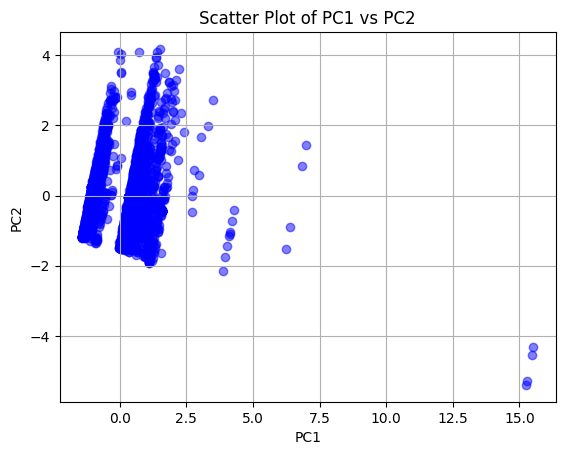

In [ ]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid()
plt.show()


In [ ]:
from scipy.stats import entropy

# 計算每個值的出現頻率
value_counts = db['Chemical Class'].value_counts(normalize=True)
sz_value_counts = db['Scientific Name'].value_counts(normalize=True)

# 使用scipy的entropy函數計算信息熵
sample_id_entropy = entropy(value_counts)
sz_entropy = entropy(sz_value_counts)
print(f"Entropy of Chemical Class and Scientific Name: {sample_id_entropy}")
print(f"Entropy of Scientific Name: {sz_entropy}")


Entropy of Chemical Class and Scientific Name: 1.719160536152191
Entropy of Scientific Name: 3.9574229949024966


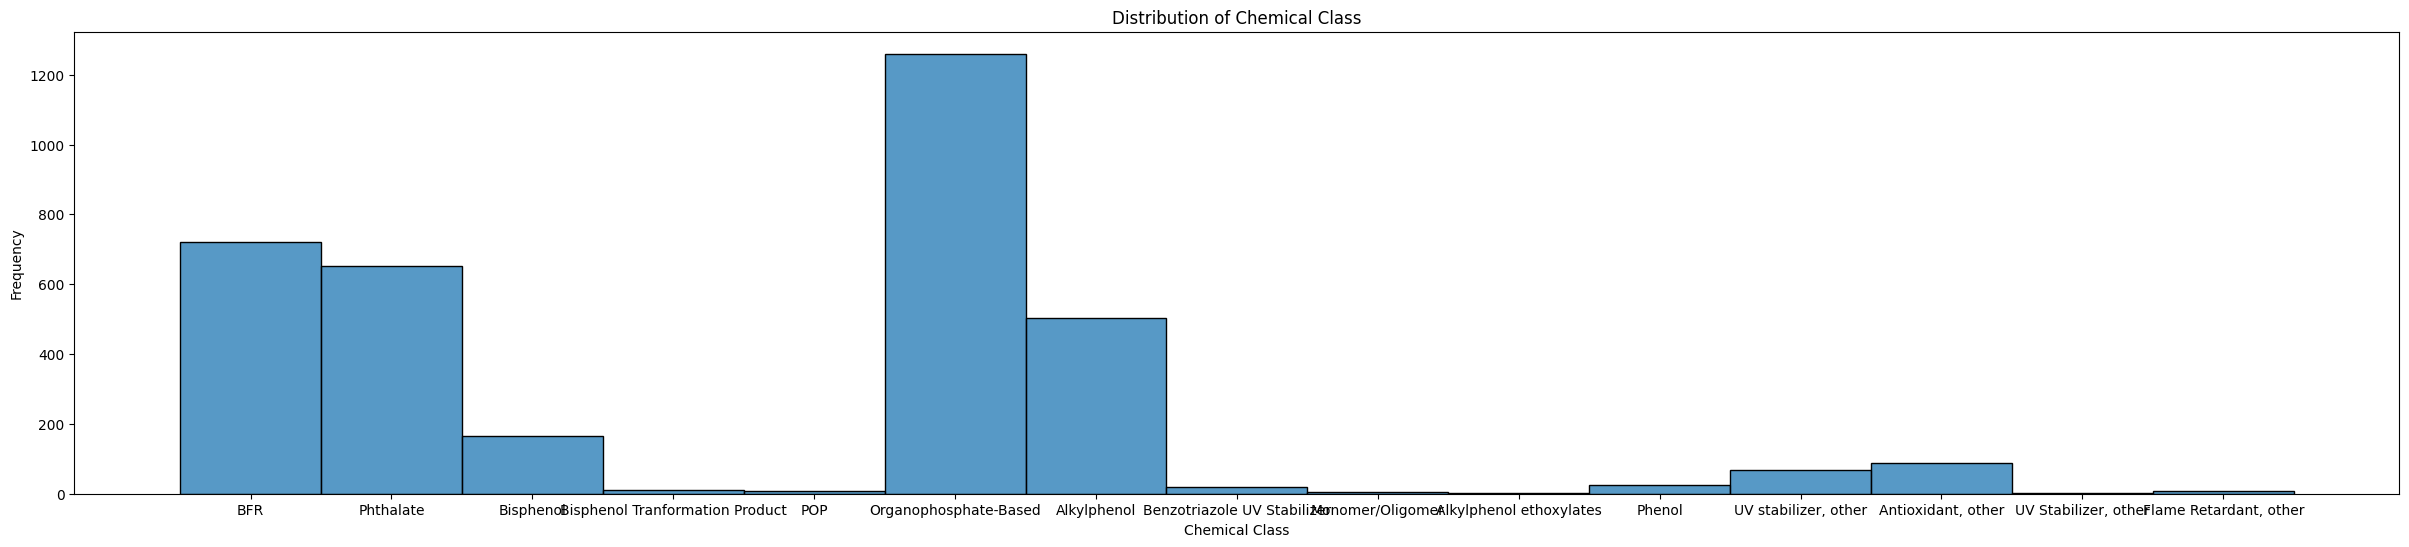

Chemical Class
Organophosphate-Based    1260
BFR                       722
Phthalate                 651
Alkylphenol               503
Bisphenol                 165
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 6))
sns.histplot(db['Chemical Class'], kde=False)
plt.title('Distribution of Chemical Class')
plt.xlabel('Chemical Class')
plt.ylabel('Frequency')
plt.show()
top_5_chemical_classes = db['Chemical Class'].value_counts().head(5)
print(top_5_chemical_classes)



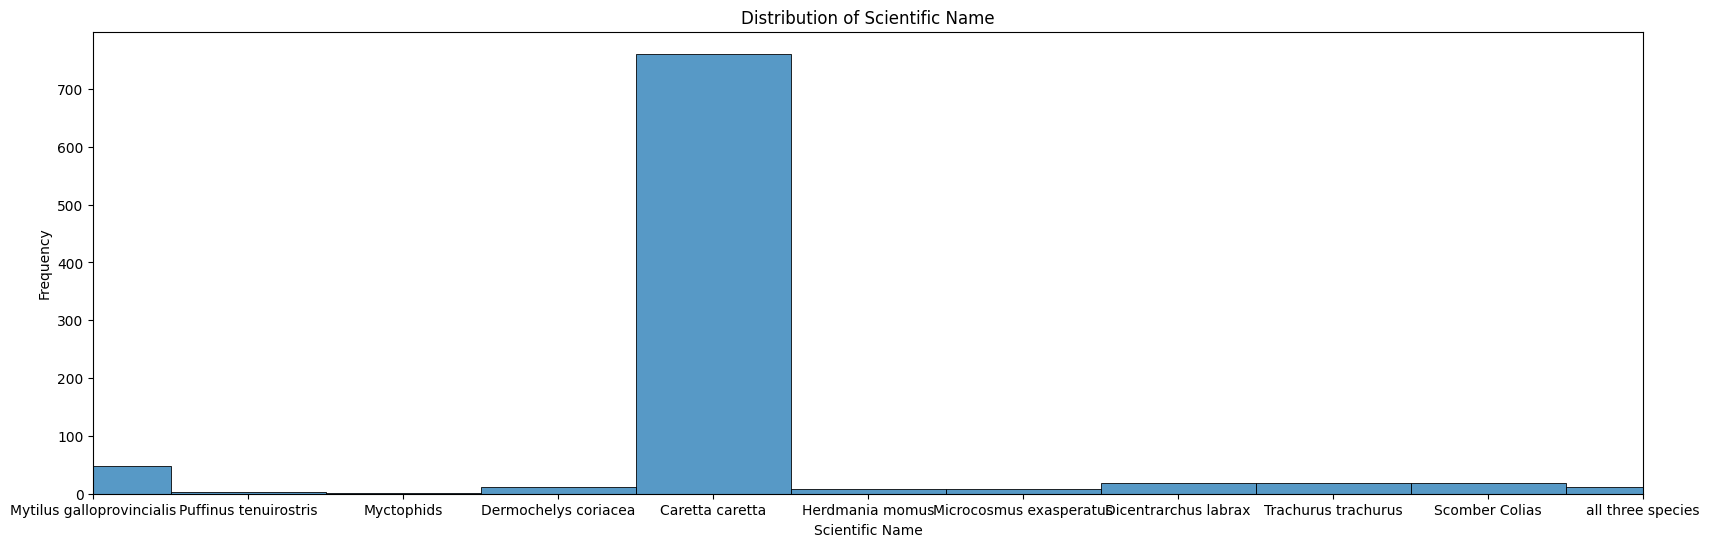

Scientific Name
Caretta caretta                                                                                    761
Not Reported                                                                                       436
Mytilus edulis                                                                                      82
Neverita didmya; Rapana venosa; Amusium; Scapharca subcrenata; Mytilus edulis; Meretix meretrix     81
Perna viridis                                                                                       65
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.histplot(db['Scientific Name'], kde=False)
plt.title('Distribution of Scientific Name')
plt.xlabel('Scientific Name')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()
top_5_Scientific_Name = db['Scientific Name'].value_counts().head(5)
print(top_5_Scientific_Name)


# Sample ID 和chemical class交叉表(相關性分析)

In [ ]:
import pandas as pd

cross_tab = pd.crosstab(db['Chemical Class'], db['Scientific Name'])
print(cross_tab)
cross_tab_percentage = pd.crosstab(db['Chemical Class'], db['Scientific Name'], normalize='all')
print(cross_tab_percentage)


Scientific Name                  Acanthogobius flavimanus  \
Chemical Class                                              
Alkylphenol                                             0   
Alkylphenol ethoxylates                                 0   
Antioxidant, other                                      0   
BFR                                                     5   
Benzotriazole UV Stabilizer                             0   
Bisphenol                                               0   
Bisphenol Tranformation Product                         0   
Flame Retardant, other                                  0   
Monomer/Oligomer                                        0   
Organophosphate-Based                                   0   
POP                                                     0   
Phenol                                                  0   
Phthalate                                               0   
UV Stabilizer, other                                    0   
UV stabilizer, other    

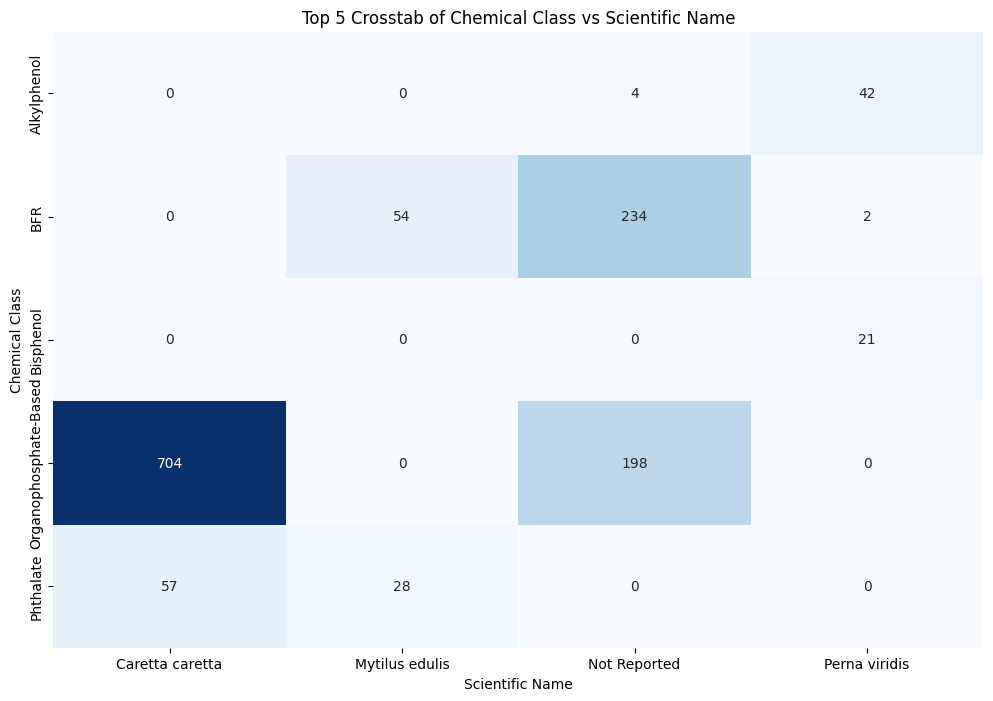

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 most frequent values for each feature
top_chemical_classes = db['Chemical Class'].value_counts().nlargest(5).index
top_scientific_names = db['Scientific Name'].value_counts().nlargest(5).index

# Filter the dataframe based on top values
filtered_db = db[db['Chemical Class'].isin(top_chemical_classes) & db['Scientific Name'].isin(top_scientific_names)]

# Compute the crosstab
cross_tab = pd.crosstab(filtered_db['Chemical Class'], filtered_db['Scientific Name'])

# Visualize the crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Top 5 Crosstab of Chemical Class vs Scientific Name')
plt.xlabel('Scientific Name')
plt.ylabel('Chemical Class')
plt.show()


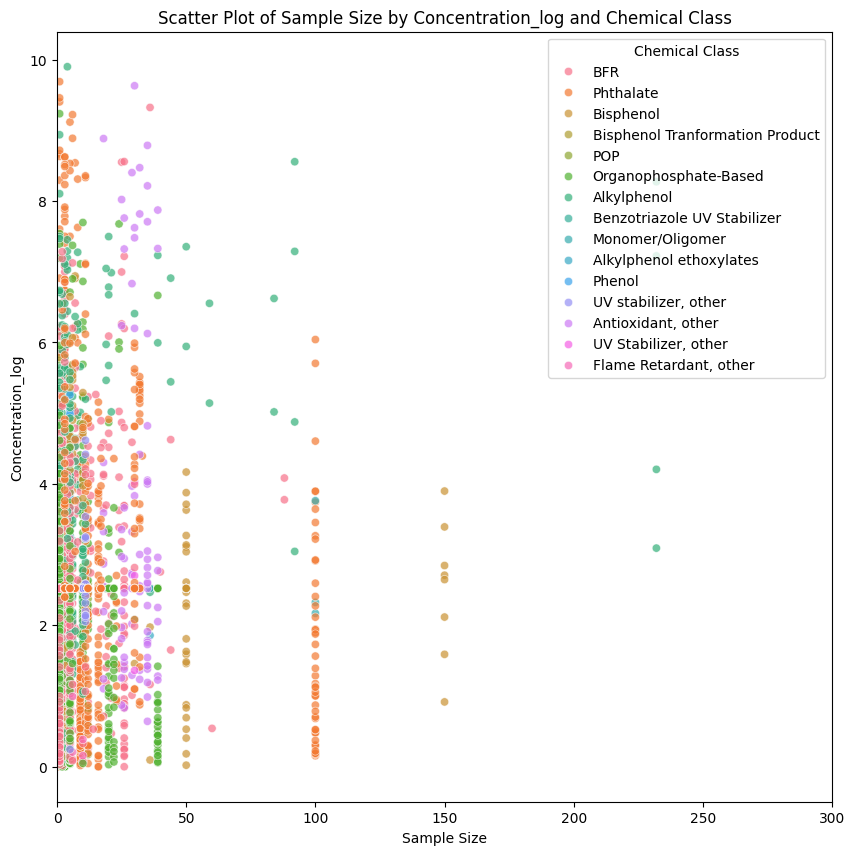

In [ ]:
# 假设有一个数值型变量，如 Sample Size
plt.figure(figsize=(10, 10))

# 计算每个 chemical class 的出现频率
class_counts = db['Chemical Class'].value_counts()

threshold = 100
# 过滤出频数大于阈值的 chemical class
valid_classes = class_counts[class_counts > threshold].index

# 过滤数据集，仅保留有效的 chemical class
filtered_data = db[db['Chemical Class'].isin(valid_classes)]
sns.scatterplot(data=db, x='Sample Size', y='Concentration_log', hue='Chemical Class', alpha=0.7)
plt.title('Scatter Plot of Sample Size by Concentration_log and Chemical Class')
plt.xlim(0, 300)
plt.xlabel('Sample Size')
plt.ylabel('Concentration_log')
plt.legend(title='Chemical Class')
plt.show()


# 機器學習模型訓練
## 決策樹(CART)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # 標籤編碼器：將文字型特徵轉為數值型
# le_scientific_name = LabelEncoder()
# le_chemical_class = LabelEncoder()

# # 編碼 Chemical Class
# db['Chemical Class'] = le_chemical_class.fit_transform(db['Chemical Class'])
# print(db['Chemical Class'].head())
# # 特徵與目標變數
# X = db[['Chemical Class', 'Concentration_log']]  # Features
# y = db['Scientific Name']  # Target

# # 對 Scientific Name 進行標籤編碼
# y_encoded = le_scientific_name.fit_transform(y)

# # 建立與訓練決策樹模型
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X, y_encoded)

# # 預測 Scientific Name
# y_pred_encoded = model.predict(X)

# # 計算準確度
# accuracy = accuracy_score(y_encoded, y_pred_encoded)
# print(f"模型的準確度 (accuracy): {accuracy:.4f}")

# # 將預測的數值型標籤逆編碼回原始標籤
# y_pred_decoded = le_scientific_name.inverse_transform(y_pred_encoded)

# # 將預測的值填補到數據集（這部分可以視需要選擇性執行）
# db['Predicted Scientific Name'] = y_pred_decoded

# # 列出預測結果
# print("預測結果：")
# print(db[['Chemical Class', 'Concentration_log', 'Predicted Scientific Name']].head())


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd

# 假設資料存放在 db DataFrame 中
# 初始化標籤編碼器
le_scientific_name = LabelEncoder()
le_chemical_class = LabelEncoder()
le_location = LabelEncoder()

# 將 Chemical Class 和 Sample Collection Location - Water Body 編碼
db['Chemical Class'] = le_chemical_class.fit_transform(db['Chemical Class'])
db['Sample Collection Location - Water Body'] = le_location.fit_transform(db['Sample Collection Location - Water Body'])

# 特徵與目標變數
X = db[['Chemical Class', 'Concentration_log', 'Sample Collection Location - Water Body']]  # Features
y = db['Scientific Name']  # Target

# 對 Scientific Name 進行標籤編碼
y_encoded = le_scientific_name.fit_transform(y)

# 定義分類模型
models_classification = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
}

# 訓練和預測分類模型
for model_name, model in models_classification.items():
    print(f"訓練模型: {model_name}")

    # 訓練模型
    model.fit(X, y_encoded)

    # 預測結果
    y_pred = model.predict(X)

    # 還原預測結果為原始類別
    y_pred_decoded = le_scientific_name.inverse_transform(y_pred)

    # 計算衡量指標
    accuracy = accuracy_score(y_encoded, y_pred)
    precision = precision_score(y_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_encoded, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_encoded, y_pred, average='weighted', zero_division=0)

    # 輸出結果
    print(f"準確度 (accuracy): {accuracy:.4f}")
    print(f"精確度 (precision): {precision:.4f}")
    print(f"召回率 (recall): {recall:.4f}")
    print(f"F1 分數 (F1 score): {f1:.4f}")
    print(f"還原後的預測結果: {y_pred_decoded[:10]}")  # 示範前 10 筆還原結果
    print('-' * 50)


訓練模型: Decision Tree
準確度 (accuracy): 0.8875
精確度 (precision): 0.9350
召回率 (recall): 0.8875
F1 分數 (F1 score): 0.8888
還原後的預測結果: ['Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis']
--------------------------------------------------
訓練模型: Random Forest
準確度 (accuracy): 0.8875
精確度 (precision): 0.9269
召回率 (recall): 0.8875
F1 分數 (F1 score): 0.8877
還原後的預測結果: ['Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis'
 'Mytilus galloprovincialis' 'Mytilus galloprovincialis']
--------------------------------------------------
訓練模型: Gradient Boosting
準確度 (accuracy): 0.0283
精確度 (precision): 0.0304
召回率 (reca

##結果預測

In [ ]:
print(le_chemical_class.classes_)  # This should show the original categories of 'Chemical Class'


['Alkylphenol' 'Alkylphenol ethoxylates' 'Antioxidant, other' 'BFR'
 'Benzotriazole UV Stabilizer' 'Bisphenol'
 'Bisphenol Tranformation Product' 'Flame Retardant, other'
 'Monomer/Oligomer' 'Organophosphate-Based' 'POP' 'Phenol' 'Phthalate'
 'UV Stabilizer, other' 'UV stabilizer, other']


In [ ]:
# # Map the encoded values back to their original class names
# db['Chemical Class'] = le_chemical_class.inverse_transform(db['Chemical Class'])

# # Now print the updated 'Chemical Class' column
# print(db['Chemical Class'].head())


In [ ]:
# Now reverse the encoding for 'Chemical Class'
db['Chemical Class'] = le_chemical_class.inverse_transform(db['Chemical Class'])

# Reverse the encoding for 'Sample Collection Location - Water Body' if needed
db['Sample Collection Location - Water Body'] = le_location.inverse_transform(db['Sample Collection Location - Water Body'])


In [ ]:
# # 將編碼的數值轉換回原始的類別名稱
# db['Chemical Class'] = le_chemical_class.inverse_transform(db['Chemical Class'])
# db['Sample Collection Location - Water Body'] = le_location.inverse_transform(db['Sample Collection Location - Water Body'])

# 獲取預測的可能性分數
y_prob = model.predict_proba(X)

# 添加預測結果到數據集
db['Predicted Scientific Name'] = le_scientific_name.inverse_transform(model.predict(X))
db['Prediction Probability'] = y_prob.max(axis=1)  # 取每筆預測的最大可能性

# 按化學物質和水域分組
impact_summary = db.groupby(['Chemical Class', 'Sample Collection Location - Water Body'])['Predicted Scientific Name'].value_counts()

# 查看特定化學物質影響的物種
print(impact_summary)


Chemical Class        Sample Collection Location - Water Body    Predicted Scientific Name    
Alkylphenol           Arabian Sea, Bay of Bengal, Laccadive Sea  Perna viridis                     8
                      Banda Sea                                  Perna viridis                     8
                      Gulf of Thailand and Malacca Strait        Perna viridis                     8
                      Ningbo, East China Sea                     Boleophthalmus pectinirostris    11
                                                                 Mugil cephalus                    3
                                                                                                  ..
UV stabilizer, other  Pearl River Estuary, South China Sea       Muraensox cinereus                1
                                                                 Nibea albiflora                   1
                                                                 Portunus pelagicus              

<ipython-input-265-659ad1f4173b>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = pivot_table.applymap(lambda x: 'High' if x > 0.9 else '')


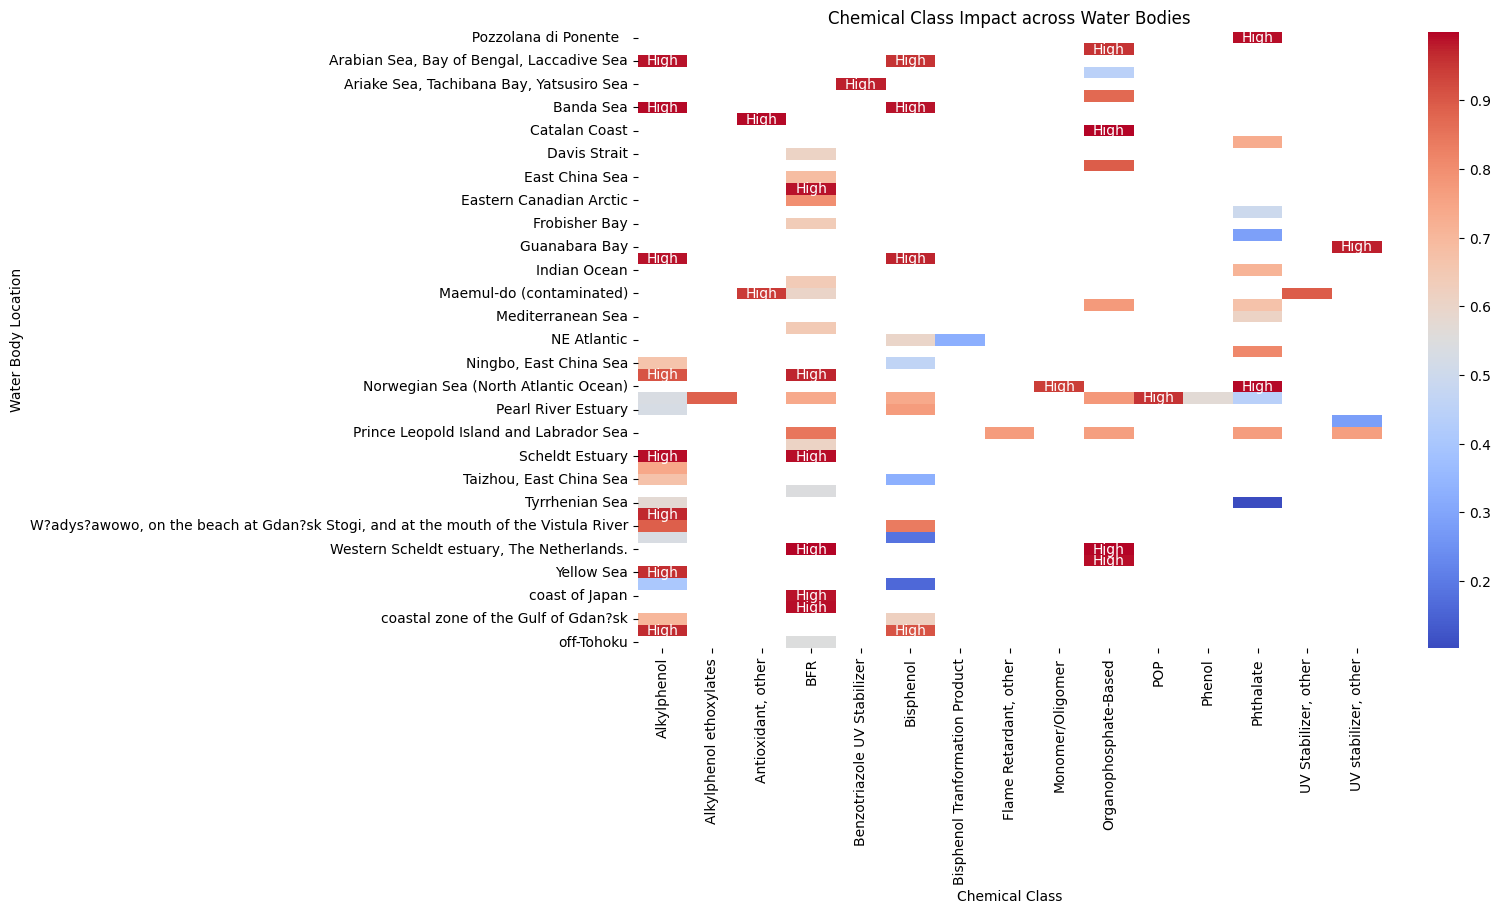

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 db 是您的資料集，且 Prediction Probability 已經計算完成

# 創建樞紐表
pivot_table = db.pivot_table(
    index='Sample Collection Location - Water Body',
    columns='Chemical Class',
    values='Prediction Probability',
    aggfunc='mean'
)

# 創建一個新的 DataFrame 來存儲要顯示的文字
# 如果大於0.9，則顯示 'High', 否則顯示空白
annot_matrix = pivot_table.applymap(lambda x: 'High' if x > 0.9 else '')

# 繪製熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=annot_matrix, cmap='coolwarm', fmt='', cbar=True)
plt.title('Chemical Class Impact across Water Bodies')
plt.xlabel('Chemical Class')
plt.ylabel('Water Body Location')
plt.show()


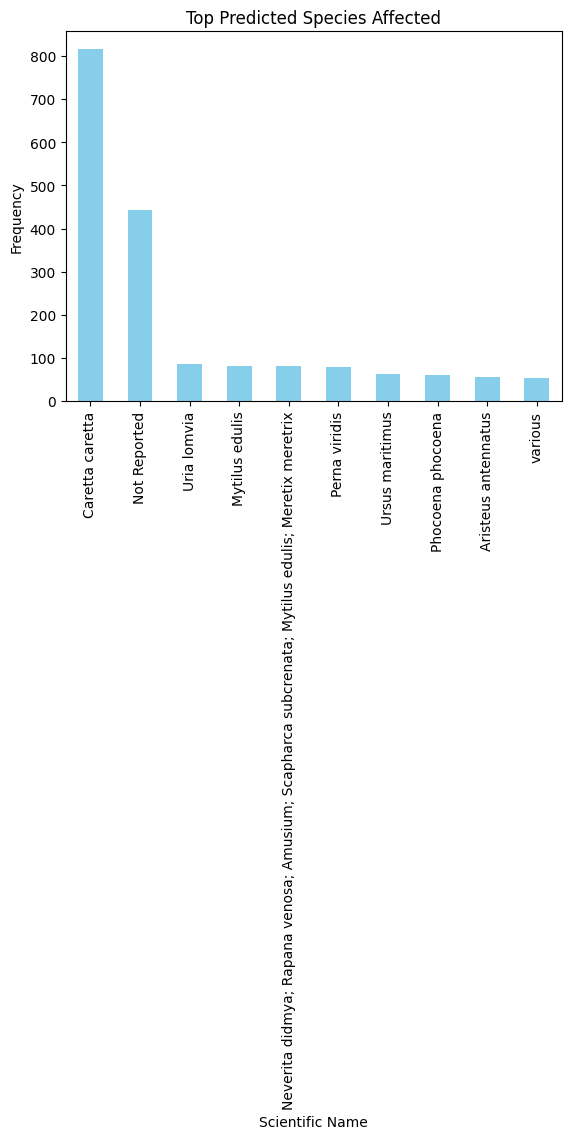

In [ ]:
species_impact = db['Predicted Scientific Name'].value_counts().head(10)
species_impact.plot(kind='bar', color='skyblue')
plt.title('Top Predicted Species Affected')
plt.xlabel('Scientific Name')
plt.ylabel('Frequency')
plt.show()


<ipython-input-267-aa6e8d491c0e>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


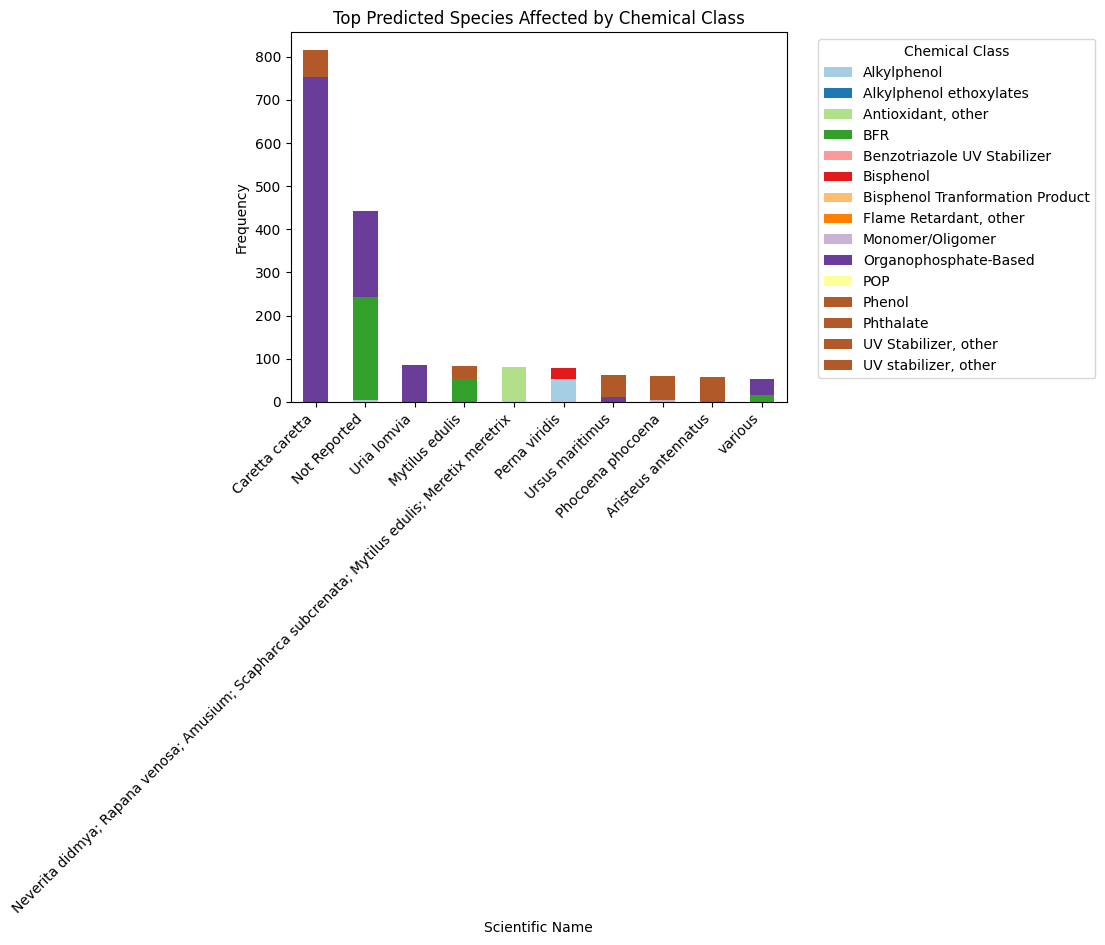

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 predicted species and their associated Chemical Class
species_impact = db.groupby(['Predicted Scientific Name', 'Chemical Class']).size().unstack(fill_value=0)

# Select the top 10 species by frequency
top_species = db['Predicted Scientific Name'].value_counts().head(10).index
species_impact_top10 = species_impact.loc[top_species]

# Plotting
species_impact_top10.plot(kind='bar', stacked=True, color=plt.cm.Paired(range(len(species_impact_top10.columns))))
plt.title('Top Predicted Species Affected by Chemical Class')
plt.xlabel('Scientific Name')
plt.ylabel('Frequency')
plt.legend(title='Chemical Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 深度學習模型訓練

In [ ]:
# 將數據轉換為 3D 格式以適應 LSTM
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# 將目標變數進行 One-hot 編碼
y_train_categorical = to_categorical(y_train, num_classes=len(le_scientific_name.classes_))
y_test_categorical = to_categorical(y_test, num_classes=len(le_scientific_name.classes_))

# 定義 LSTM 模型
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
lstm_model.add(Dense(len(le_scientific_name.classes_), activation='softmax'))

# 編譯模型
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練 LSTM 模型
history = lstm_model.fit(X_train_lstm, y_train_categorical, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test_categorical))

# 評估 LSTM 模型
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_categorical)
print(f"LSTM 模型準確度: {lstm_accuracy:.4f}")

# ================================
# 視覺化 LSTM 訓練過程
# ================================

import matplotlib.pyplot as plt

# 繪製訓練和驗證損失
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 繪製訓練和驗證準確度
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 假設數據已經準備好
# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# One-hot 編碼目標變數
y_train_categorical = to_categorical(y_train, num_classes=len(le_scientific_name.classes_))
y_test_categorical = to_categorical(y_test, num_classes=len(le_scientific_name.classes_))

# 定義特徵提取層（FCNN 部分）
input_layer = Input(shape=(X_train.shape[1],))
fc_layer = Dense(128, activation='relu')(input_layer)
fc_layer = Dense(64, activation='relu')(fc_layer)

# 將特徵轉換為序列格式供 LSTM 使用
reshape_layer = Reshape((1, 64))(fc_layer)

# 定義序列建模層（LSTM 部分）
lstm_layer = LSTM(64, return_sequences=False)(reshape_layer)
output_layer = Dense(len(le_scientific_name.classes_), activation='softmax')(lstm_layer)

# 建立模型
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# 編譯模型
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
hybrid_model.fit(X_train, y_train_categorical, epochs=500, batch_size=32, validation_data=(X_test, y_test_categorical))

# 評估模型
loss, accuracy = hybrid_model.evaluate(X_test, y_test_categorical)
print(f"Hybrid 模型準確度: {accuracy:.4f}")


# AUC Curve

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
X = db[['Water Body Encoded']]  # 更新為需要的列
y = db['Scientific Name Encoded']  # 使用編碼的科學名稱作為目標變數

使用高斯貝氏模型計算ROC Curve

In [ ]:
# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=gnb.classes_)  # Use gnb.classes_ for all unique classes
n_classes = y_test_bin.shape[1]

# Calculate ROC curve and AUC for each class using OvR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    classifier = OneVsRestClassifier(gnb) # Use OneVsRestClassifier with your GaussianNB model
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test) # Fit and get probability scores
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i]) # Calculate ROC for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], color='green', label=f'Gussian Navie Bayes(AUC = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes (Class 0)")
plt.legend(loc="lower right")
plt.show()

使用隨機斯林計算ROC Curve

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=0)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

# Binarize the output for multi-class ROC curve calculation
y_test_bin = label_binarize(y_test, classes=rfc.classes_)
n_classes = y_test_bin.shape[1]

# Get prediction probabilities for all classes
y_pred_proba = rfc.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_pred_proba, average="micro")

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], color='blue', label=f'Random Forest (AUC = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Class 0")
plt.legend(loc="lower right")
plt.show()

# Artificial Neural Network
使用Sample Size進行預測


In [ ]:
from sklearn import preprocessing, neural_network, model_selection
nms = preprocessing.MinMaxScaler()
mlp = neural_network.MLPClassifier()

In [ ]:
db_ss = pd.DataFrame(nms.fit_transform(db['Sample Size'].values.reshape(-1,1)), columns=['Sample Size'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(db_ss, y, test_size=0.33, random_state=42)
# print(db.shape)
mlp.fit(X_train, y_train)
mlp.predict([[.5]])
mlp.score(X_test, y_test)

# Cluster

In [ ]:
from sklearn import cluster, metrics


In [ ]:
kmeans = cluster.KMeans(n_clusters=10).fit(db[['Sample Size']])
cluster_labels = kmeans.labels_
print("分群結果")
print(cluster_labels)


印出績效

In [ ]:
silhouette_avg = metrics.silhouette_score(db[['Sample Size']], cluster_labels)
print(silhouette_avg)

In [ ]:
silhouette_avg = []
for i in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=i).fit(db[['Sample Size']])
    cluster_labels = kmeans.labels_
    # Calculate the silhouette score and append it to the list
    silhouette_score_value = metrics.silhouette_score(db[['Sample Size']], cluster_labels)
    silhouette_avg.append(silhouette_score_value)

plt.bar(range(2,10), silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Hierarchical Cluster

In [ ]:
hclust = cluster.AgglomerativeClustering(linkage = "ward", n_clusters=8)

In [ ]:
hclust.fit(db[['Sample Size']])
cluster_labels = hclust.labels_
print("分群結果")
print(cluster_labels)
db_y = db[['Sample Size']]
print("真實結果")
print(db_y)

印出績效

In [ ]:
silhouette_avg = metrics.silhouette_score(db[['Sample Size']], cluster_labels)
print(silhouette_avg)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(db[['Sample Size']], method='ward')
dendrogram(mergings, labels = db['Sample Size'].values)
plt.xlabel('Sample Size')
plt.ylabel('Amounts')
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

建立模型

In [ ]:
dbscan = DBSCAN(eps=10, min_samples=10).fit(db[['Sample Size']])
dbscan.fit(db[['Sample Size']])

pca = PCA(n_components=1)
db_pca = pca.fit_transform(db[['Sample Size']])

In [ ]:
c1 = c2 = c3 = None

for i in range(0, db_pca.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(db_pca[i,0], db_pca[i,0], c='red', marker='o')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(db_pca[i,0], db_pca[i,0], c='blue', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(db_pca[i,0], db_pca[i,0], c='green', marker='o')
plt.legend([c1,c2,c3],['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Clustering')
plt.show()